# Import Statement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as go
import seaborn as sns
import scipy as sci
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# Exploring the Dataset

In [2]:
pd.set_option('display.max_columns',None)

wdm = pd.read_excel('World_development_mesurement.xlsx')
wdm

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Ease of Business  Energy Usage  \
0                        NaN               NaN       26998.0   
1                        NaN               NaN        7499.0   
2                        NaN               NaN        1983.0   
3                        NaN               NaN        1836.0   
4                        NaN               NaN           NaN   
...                      ...               ...           ...   
2699                     NaN               NaN           NaN   
2700                     5.0               4.0     2132446.0   
2701                     7.0              85.0           NaN   
2702                   144.0             180.0           NaN   
2703                     NaN               NaN           NaN   

                      GDP  Health Exp % GDP Health Exp/Capita  \
0         $54,790,058,957             0.035               $60   
1          $9,129,594,819             0.034               $22   
2          $2,359,122,303             0.043               $15   
3          $5,788,311,645             0.047              $152   
4          $2,610,959,139             0.051               $12   
...                   ...               ...               ...   
2699                  NaN               NaN               NaN   
2700  $16,244,600,000,000             0.179            $8,895   
2701      $50,004,354,667             0.089            $1,308   
2702     $381,286,223,859             0.046              $593   
2703                  NaN               NaN               NaN   

      Hours to do Tax  Infant Mortality Rate  Internet Usage  \
0                 NaN                  0.034             0.0   
1                 NaN                  0.128             0.0   
2                 NaN                  0.090             0.0   
3                 NaN                  0.054             0.0   
4                 NaN                  0.096             0.0   
...               ...                    ...             ...   
2699              NaN                    NaN             NaN   
2700            175.0                  0.006             0.8   
2701            310.0                  0.010             0.5   
2702            792.0                  0.013             0.5   
2703              NaN                    NaN             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0                0.100                    71.0                  67.0   
1                1.032                    47.0                  44.0   
2                  NaN                    57.0                  53.0   
3                0.155                    52.0                  49.0   
4                  NaN                    52.0                  49.0   
...                ...                     ...                   ...   
2699               NaN                     NaN                   NaN   
2700             0.033                    81.0                  76.0   
2701             0.112                    80.0                  74.0   
2702             0

In [3]:
wdm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [4]:
wdm[wdm.duplicated()]

Empty DataFrame
Columns: [Birth Rate, Business Tax Rate, CO2 Emissions, Country, Days to Start Business, Ease of Business, Energy Usage, GDP, Health Exp % GDP, Health Exp/Capita, Hours to do Tax, Infant Mortality Rate, Internet Usage, Lending Interest, Life Expectancy Female, Life Expectancy Male, Mobile Phone Usage, Number of Records, Population 0-14, Population 15-64, Population 65+, Population Total, Population Urban, Tourism Inbound, Tourism Outbound]
Index: []

- There are 2704 records and 25 features in the data

In [5]:
wdm.Country.value_counts()

Country
Algeria                  13
Angola                   13
Turkey                   13
Ukraine                  13
United Kingdom           13
                         ..
Malaysia                 13
Maldives                 13
Mongolia                 13
Myanmar                  13
Virgin Islands (U.S.)    13
Name: count, Length: 208, dtype: int64

- There are 208 Unique Country names in the data
- The Dataset spans over 13 years as every country is repeated 13 times

In [6]:
# Removing Ease of Business and Number of Records as the values will change over 13 years and may not be accurate

df = wdm.drop(['Ease of Business','Number of Records'],axis=1)
df

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0          0.020               NaN        87931.0                   Algeria   
1          0.050               NaN         9542.0                    Angola   
2          0.043               NaN         1617.0                     Benin   
3          0.027               NaN         4276.0                  Botswana   
4          0.046               NaN         1041.0              Burkina Faso   
...          ...               ...            ...                       ...   
2699         NaN               NaN            NaN  Turks and Caicos Islands   
2700       0.013             46.4%            NaN             United States   
2701       0.015             41.9%            NaN                   Uruguay   
2702       0.020             61.9%            NaN             Venezuela, RB   
2703       0.011               NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage                  GDP  \
0                        NaN       26998.0      $54,790,058,957   
1                        NaN        7499.0       $9,129,594,819   
2                        NaN        1983.0       $2,359,122,303   
3                        NaN        1836.0       $5,788,311,645   
4                        NaN           NaN       $2,610,959,139   
...                      ...           ...                  ...   
2699                     NaN           NaN                  NaN   
2700                     5.0     2132446.0  $16,244,600,000,000   
2701                     7.0           NaN      $50,004,354,667   
2702                   144.0           NaN     $381,286,223,859   
2703                     NaN           NaN                  NaN   

      Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0                0.035               $60              NaN   
1                0.034               $22              NaN   
2                0.043               $15              NaN   
3                0.047              $152              NaN   
4                0.051               $12              NaN   
...                ...               ...              ...   
2699               NaN               NaN              NaN   
2700             0.179            $8,895            175.0   
2701             0.089            $1,308            310.0   
2702             0.046              $593            792.0   
2703               NaN               NaN              NaN   

      Infant Mortality Rate  Internet Usage  Lending Interest  \
0                     0.034             0.0             0.100   
1                     0.128             0.0             1.032   
2                     0.090             0.0               NaN   
3                     0.054             0.0             0.155   
4                     0.096             0.0               NaN   
...                     ...             ...               ...   
2699                    NaN             NaN               NaN   
2700                  0.006             0.8             0.033   
2701                  0.010             0.5             0.112   
2702                  0.013             0.5             0.164   
2703                    NaN             0.4               NaN   

      Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                     NaN                   NaN                 NaN   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5  

### Removing Special Characters and Converting into Numerical Types

In [7]:
for i in df.columns:
    if i != 'Country':
        df[i] = df[i].apply(lambda x: re.sub("[$,%]","",x)if isinstance(x,str) and x is not None else x)
        if df[i].dtype != 'o':
             df[i] = pd.to_numeric(df[i], errors = 'coerce')
df

Birth Rate  Business Tax Rate  CO2 Emissions                   Country  \
0          0.020                NaN        87931.0                   Algeria   
1          0.050                NaN         9542.0                    Angola   
2          0.043                NaN         1617.0                     Benin   
3          0.027                NaN         4276.0                  Botswana   
4          0.046                NaN         1041.0              Burkina Faso   
...          ...                ...            ...                       ...   
2699         NaN                NaN            NaN  Turks and Caicos Islands   
2700       0.013               46.4            NaN             United States   
2701       0.015               41.9            NaN                   Uruguay   
2702       0.020               61.9            NaN             Venezuela, RB   
2703       0.011                NaN            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
0                        NaN       26998.0  5.479006e+10             0.035   
1                        NaN        7499.0  9.129595e+09             0.034   
2                        NaN        1983.0  2.359122e+09             0.043   
3                        NaN        1836.0  5.788312e+09             0.047   
4                        NaN           NaN  2.610959e+09             0.051   
...                      ...           ...           ...               ...   
2699                     NaN           NaN           NaN               NaN   
2700                     5.0     2132446.0  1.624460e+13             0.179   
2701                     7.0           NaN  5.000435e+10             0.089   
2702                   144.0           NaN  3.812862e+11             0.046   
2703                     NaN           NaN           NaN               NaN   

      Health Exp/Capita  Hours to do Tax  Infant Mortality Rate  \
0                  60.0              NaN                  0.034   
1                  22.0              NaN                  0.128   
2                  15.0              NaN                  0.090   
3                 152.0              NaN                  0.054   
4                  12.0              NaN                  0.096   
...                 ...              ...                    ...   
2699                NaN              NaN                    NaN   
2700             8895.0            175.0                  0.006   
2701             1308.0            310.0                  0.010   
2702              593.0            792.0                  0.013   
2703                NaN              NaN                    NaN   

      Internet Usage  Lending Interest  Life Expectancy Female  \
0                0.0             0.100                    71.0   
1                0.0             1.032                    47.0   
2                0.0               NaN                    57.0   
3                0.0             0.155                    52.0   
4                0.0               NaN                    52.0   
...              ...               ...                     ...   
2699             NaN               NaN                     NaN   
2700             0.8             0.033                    81.0   
2701             0.5             0.112                    80.0   
2702             0.5             0.164                    78.0   
2703             0.4               NaN                    83.0   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                     67.0                 0.0            0.342   
1                     44.0                 0.0            0.476   
2                     53.0                 0.0            0.454   
3                     49.0                 0.1            0.383   
4                     49.0                 0.0            0.468   
...                    ...                 ...              ...   
2699                   NaN               

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       2395 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

### Null Values

#### Percentage of Null Values in each feature

In [9]:
for i in df.columns:
    print("The feature '{}'  has {}% of NULL values".format(i,np.round(df[i].isnull().sum()*100/len(df),2)))

The feature 'Birth Rate'  has 4.4% of NULL values
The feature 'Business Tax Rate'  has 47.37% of NULL values
The feature 'CO2 Emissions'  has 21.41% of NULL values
The feature 'Country'  has 0.0% of NULL values
The feature 'Days to Start Business'  has 36.46% of NULL values
The feature 'Energy Usage'  has 33.99% of NULL values
The feature 'GDP'  has 7.77% of NULL values
The feature 'Health Exp % GDP'  has 11.43% of NULL values
The feature 'Health Exp/Capita'  has 11.43% of NULL values
The feature 'Hours to do Tax'  has 47.63% of NULL values
The feature 'Infant Mortality Rate'  has 9.62% of NULL values
The feature 'Internet Usage'  has 6.4% of NULL values
The feature 'Lending Interest'  has 30.47% of NULL values
The feature 'Life Expectancy Female'  has 5.03% of NULL values
The feature 'Life Expectancy Male'  has 5.03% of NULL values
The feature 'Mobile Phone Usage'  has 6.18% of NULL values
The feature 'Population 0-14'  has 8.14% of NULL values
The feature 'Population 15-64'  has 8.14

Visualizing the Percentage of Null Values in Each Feature

In [10]:
#import missingno as mn
#mn.matrix(df)
#plt.show()

#### Using KNN Imputer to deal with the Null Values

Normalizing Data

In [11]:
df1 = df.copy()
df1 = df1.drop('Country',axis=1)
df1=pd.DataFrame(MinMaxScaler().fit_transform(df1),columns=df1.columns)
df1

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.282609                NaN       0.010610                     NaN   
1       0.934783                NaN       0.001151                     NaN   
2       0.782609                NaN       0.000194                     NaN   
3       0.434783                NaN       0.000515                     NaN   
4       0.847826                NaN       0.000125                     NaN   
...          ...                ...            ...                     ...   
2699         NaN                NaN            NaN                     NaN   
2700    0.130435           0.115443            NaN                0.005772   
2701    0.173913           0.101843            NaN                0.008658   
2702    0.282609           0.162285            NaN                0.206349   
2703    0.086957                NaN            NaN                     NaN   

      Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0         0.009895  0.003369          0.124424           0.005855   
1         0.002746  0.000558          0.119816           0.002019   
2         0.000724  0.000141          0.161290           0.001312   
3         0.000670  0.000352          0.179724           0.015142   
4              NaN  0.000157          0.198157           0.001009   
...            ...       ...               ...                ...   
2699           NaN       NaN               NaN                NaN   
2700      0.781766  1.000000          0.788018           0.897739   
2701           NaN  0.003074          0.373272           0.131839   
2702           NaN  0.023468          0.175115           0.059661   
2703           NaN       NaN               NaN                NaN   

      Hours to do Tax  Infant Mortality Rate  Internet Usage  \
0                 NaN               0.230216             0.0   
1                 NaN               0.906475             0.0   
2                 NaN               0.633094             0.0   
3                 NaN               0.374101             0.0   
4                 NaN               0.676259             0.0   
...               ...                    ...             ...   
2699              NaN                    NaN             NaN   
2700         0.062983               0.028777             0.8   
2701         0.115147               0.057554             0.5   
2702         0.301391               0.079137             0.5   
2703              NaN                    NaN             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0             0.019153                0.666667              0.588235   
1             0.207056                0.166667              0.137255   
2                  NaN                0.375000              0.313725   
3             0.030242                0.270833              0.235294   
4                  NaN                0.270833              0.235294   
...                ...                     ...                   ...   
2699               NaN                     NaN                   NaN   
2700          0.005645                0.875000              0.764706   
2701          0.021573                0.854167              0.725490   
2702          0.032056                0.812500              0.686275   
2703               NaN                0.916667              0.764706   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0               0.000000         0.586387          0.377604        0.149378   
1               0.000000         0.937173          0.065104        0.091286   
2               0.000000         0.879581          0.111979        0.107884   
3               0.034483         0.693717          0.294271        0.107884   
4               0.000000         0.916230          0.080729        0.103734   
...                  ...              ...               ...             ...   
2699                 NaN              NaN            

In [12]:
null_imputer = KNNImputer()
imputed_df = pd.DataFrame(null_imputer.fit_transform(df1),columns=df1.columns)
imputed_df

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.282609           0.074403       0.010610                0.062915   
1       0.934783           0.416017       0.001151                0.183838   
2       0.782609           0.179027       0.000194                0.050216   
3       0.434783           0.043518       0.000515                0.146609   
4       0.847826           0.180659       0.000125                0.070130   
...          ...                ...            ...                     ...   
2699    0.213043           0.044545       0.004650                0.067821   
2700    0.130435           0.115443       0.674995                0.005772   
2701    0.173913           0.101843       0.000362                0.008658   
2702    0.282609           0.162285       0.000017                0.206349   
2703    0.086957           0.137927       0.000054                0.035786   

      Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0         0.009895  0.003369          0.124424           0.005855   
1         0.002746  0.000558          0.119816           0.002019   
2         0.000724  0.000141          0.161290           0.001312   
3         0.000670  0.000352          0.179724           0.015142   
4         0.007332  0.000157          0.198157           0.001009   
...            ...       ...               ...                ...   
2699      0.000682  0.000148          0.282028           0.168807   
2700      0.781766  1.000000          0.788018           0.897739   
2701      0.003697  0.003074          0.373272           0.131839   
2702      0.021048  0.023468          0.175115           0.059661   
2703      0.005419  0.001271          0.196313           0.238340   

      Hours to do Tax  Infant Mortality Rate  Internet Usage  \
0            0.062674               0.230216             0.0   
1            0.106028               0.906475             0.0   
2            0.112674               0.633094             0.0   
3            0.077512               0.374101             0.0   
4            0.242504               0.676259             0.0   
...               ...                    ...             ...   
2699         0.063679               0.017266             0.2   
2700         0.062983               0.028777             0.8   
2701         0.115147               0.057554             0.5   
2702         0.301391               0.079137             0.5   
2703         0.097836               0.012950             0.4   

      Lending Interest  Life Expectancy Female  Life Expectancy Male  \
0             0.019153                0.666667              0.588235   
1             0.207056                0.166667              0.137255   
2             0.037621                0.375000              0.313725   
3             0.030242                0.270833              0.235294   
4             0.057419                0.270833              0.235294   
...                ...                     ...                   ...   
2699          0.027742                0.895833              0.756863   
2700          0.005645                0.875000              0.764706   
2701          0.021573                0.854167              0.725490   
2702          0.032056                0.812500              0.686275   
2703          0.019597                0.916667              0.764706   

      Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0               0.000000         0.586387          0.377604        0.149378   
1               0.000000         0.937173          0.065104        0.091286   
2               0.000000         0.879581          0.111979        0.107884   
3               0.034483         0.693717          0.294271        0.107884   
4               0.000000         0.916230          0.080729        0.103734   
...                  ...              ...               ...             ...   
2699            0.275862         0.332461          0.

In [13]:
concated_df = pd.concat([wdm['Country'],imputed_df],axis=1)
concated_df

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0                      Algeria    0.282609           0.074403       0.010610   
1                       Angola    0.934783           0.416017       0.001151   
2                        Benin    0.782609           0.179027       0.000194   
3                     Botswana    0.434783           0.043518       0.000515   
4                 Burkina Faso    0.847826           0.180659       0.000125   
...                        ...         ...                ...            ...   
2699  Turks and Caicos Islands    0.213043           0.044545       0.004650   
2700             United States    0.130435           0.115443       0.674995   
2701                   Uruguay    0.173913           0.101843       0.000362   
2702             Venezuela, RB    0.282609           0.162285       0.000017   
2703     Virgin Islands (U.S.)    0.086957           0.137927       0.000054   

      Days to Start Business  Energy Usage       GDP  Health Exp % GDP  \
0                   0.062915      0.009895  0.003369          0.124424   
1                   0.183838      0.002746  0.000558          0.119816   
2                   0.050216      0.000724  0.000141          0.161290   
3                   0.146609      0.000670  0.000352          0.179724   
4                   0.070130      0.007332  0.000157          0.198157   
...                      ...           ...       ...               ...   
2699                0.067821      0.000682  0.000148          0.282028   
2700                0.005772      0.781766  1.000000          0.788018   
2701                0.008658      0.003697  0.003074          0.373272   
2702                0.206349      0.021048  0.023468          0.175115   
2703                0.035786      0.005419  0.001271          0.196313   

      Health Exp/Capita  Hours to do Tax  Infant Mortality Rate  \
0              0.005855         0.062674               0.230216   
1              0.002019         0.106028               0.906475   
2              0.001312         0.112674               0.633094   
3              0.015142         0.077512               0.374101   
4              0.001009         0.242504               0.676259   
...                 ...              ...                    ...   
2699           0.168807         0.063679               0.017266   
2700           0.897739         0.062983               0.028777   
2701           0.131839         0.115147               0.057554   
2702           0.059661         0.301391               0.079137   
2703           0.238340         0.097836               0.012950   

      Internet Usage  Lending Interest  Life Expectancy Female  \
0                0.0          0.019153                0.666667   
1                0.0          0.207056                0.166667   
2                0.0          0.037621                0.375000   
3                0.0          0.030242                0.270833   
4                0.0          0.057419                0.270833   
...              ...               ...                     ...   
2699             0.2          0.027742                0.895833   
2700             0.8          0.005645                0.875000   
2701             0.5          0.021573                0.854167   
2702             0.5          0.032056                0.812500   
2703             0.4          0.019597                0.916667   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                 0.588235            0.000000         0.586387   
1                 0.137255            0.000000         0.937173   
2                 0.313725            0.000000         0.879581   
3                 0.235294            0.034483         0.693717   
4                 0.235294            0.000000         0.916230   
...                    ...                 ...              ...   
2699              0.756863            0.275862         0.332461   
2700              0.764706            0

In [14]:
concated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2704 non-null   object 
 1   Birth Rate              2704 non-null   float64
 2   Business Tax Rate       2704 non-null   float64
 3   CO2 Emissions           2704 non-null   float64
 4   Days to Start Business  2704 non-null   float64
 5   Energy Usage            2704 non-null   float64
 6   GDP                     2704 non-null   float64
 7   Health Exp % GDP        2704 non-null   float64
 8   Health Exp/Capita       2704 non-null   float64
 9   Hours to do Tax         2704 non-null   float64
 10  Infant Mortality Rate   2704 non-null   float64
 11  Internet Usage          2704 non-null   float64
 12  Lending Interest        2704 non-null   float64
 13  Life Expectancy Female  2704 non-null   float64
 14  Life Expectancy Male    2704 non-null   

Null Values are no longer present in the dataset

In [15]:
weights = [0.1,0.2,0.2,0.3,0.3,0.4,0.5,0.66,0.73,0.77,0.83,0.87,0.9]
weighted_mean = lambda x: np.average(x,weights=weights)
final_df = concated_df.groupby('Country')[[i for i in concated_df.columns if i!='Country']].agg(weighted_mean).reset_index()
final_df.head(50)

Country  Birth Rate  Business Tax Rate  CO2 Emissions  \
0                Afghanistan    0.732860           0.087270       0.000487   
1                    Albania    0.145871           0.096882       0.000571   
2                    Algeria    0.353293           0.176565       0.013335   
3             American Samoa    0.223990           0.041901       0.000515   
4                    Andorra    0.090352           0.116982       0.000051   
5                     Angola    0.879181           0.178775       0.002823   
6        Antigua and Barbuda    0.234725           0.104864       0.000051   
7                  Argentina    0.224145           0.274785       0.016309   
8                    Armenia    0.150566           0.086401       0.000443   
9                      Aruba    0.097119           0.085790       0.000257   
10                 Australia    0.144777           0.122233       0.033050   
11                   Austria    0.047659           0.131662       0.008004   
12                Azerbaijan    0.226814           0.093710       0.004422   
13              Bahamas, The    0.185265           0.100837       0.000149   
14                   Bahrain    0.225945           0.023423       0.001907   
15                Bangladesh    0.326827           0.084174       0.005089   
16                  Barbados    0.130435           0.095198       0.000172   
17                   Belarus    0.081393           0.262379       0.006845   
18                   Belgium    0.100978           0.148634       0.012172   
19                    Belize    0.399859           0.078941       0.000446   
20                     Benin    0.691021           0.189997       0.000494   
21                   Bermuda    0.119919           0.067882       0.000122   
22                    Bhutan    0.321038           0.096752       0.000085   
23                   Bolivia    0.443337           0.211370       0.001567   
24    Bosnia and Herzegovina    0.036114           0.076322       0.002848   
25                  Botswana    0.387445           0.032420       0.003343   
26                    Brazil    0.208805           0.176781       0.042409   
27         Brunei Darussalam    0.238359           0.059397       0.002324   
28                  Bulgaria    0.062870           0.103253       0.005297   
29              Burkina Faso    0.791356           0.118439       0.000236   
30                   Burundi    0.813031           0.515951       0.000068   
31                  Cambodia    0.414973           0.050206       0.000573   
32                  Cameroon    0.702052           0.133088       0.000648   
33                    Canada    0.086957           0.089110       0.059293   
34            Cayman Islands    0.184281           0.048446       0.000496   
35  Central African Republic    0.628280           0.439929       0.000187   
36                      Chad    0.895035           0.198206       0.000052   
37                     Chile    0.165970           0.054463       0.006112   
38                     China    0.110625           0.189390       0.811967   
39                  Colombia    0.289973           0.198423       0.010795   
40                   Comoros    0.668414           0.633726       0.000014   
41          Congo, Dem. Rep.    0.821681           0.865687       0.000621   
42               Congo, Rep.    0.689960           0.169518       0.000188   
43                Costa Rica    0.207422           0.140084       0.001485   
44             Cote d'Ivoire    0.645228           0.147510       0.000794   
45                   Croatia    0.058271           0.049265       0.002677   
46                      Cuba    0.078274           0.096095       0.003304   
47                   Curacao    0.153846           0.080415       0.000027   
48                    Cyprus    0.110304           0.048981       0.002910   
49            Czech Republic    0.074608           0.135859       0.013067   

    Days to Start Business  Energy Usage  

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 208 non-null    object 
 1   Birth Rate              208 non-null    float64
 2   Business Tax Rate       208 non-null    float64
 3   CO2 Emissions           208 non-null    float64
 4   Days to Start Business  208 non-null    float64
 5   Energy Usage            208 non-null    float64
 6   GDP                     208 non-null    float64
 7   Health Exp % GDP        208 non-null    float64
 8   Health Exp/Capita       208 non-null    float64
 9   Hours to do Tax         208 non-null    float64
 10  Infant Mortality Rate   208 non-null    float64
 11  Internet Usage          208 non-null    float64
 12  Lending Interest        208 non-null    float64
 13  Life Expectancy Female  208 non-null    float64
 14  Life Expectancy Male    208 non-null    fl

# EDA

### Feature Correlation

In [17]:
# Calculate the correlation matrix
corr_df = final_df.select_dtypes(include='number')

corr_matrix = corr_df.corr()

# Find the highly correlated columns
highly_correlated = set()
for col in corr_matrix:
    correlated_cols = corr_matrix.index[corr_matrix[col] > 0.8]
    for c in correlated_cols:
        if c != col:
            highly_correlated.add((col, c))

# Print the result
print(f"The following columns are highly correlated:\n{highly_correlated}")

The following columns are highly correlated:
{('Birth Rate', 'Infant Mortality Rate'), ('Tourism Inbound', 'GDP'), ('Infant Mortality Rate', 'Population 0-14'), ('Tourism Outbound', 'Tourism Inbound'), ('Birth Rate', 'Population 0-14'), ('GDP', 'Energy Usage'), ('Tourism Inbound', 'Tourism Outbound'), ('GDP', 'CO2 Emissions'), ('Energy Usage', 'GDP'), ('GDP', 'Tourism Outbound'), ('CO2 Emissions', 'GDP'), ('Life Expectancy Female', 'Life Expectancy Male'), ('Population 0-14', 'Birth Rate'), ('GDP', 'Tourism Inbound'), ('Infant Mortality Rate', 'Birth Rate'), ('Life Expectancy Male', 'Life Expectancy Female'), ('Energy Usage', 'CO2 Emissions'), ('CO2 Emissions', 'Energy Usage'), ('Population 0-14', 'Infant Mortality Rate'), ('Tourism Outbound', 'GDP')}


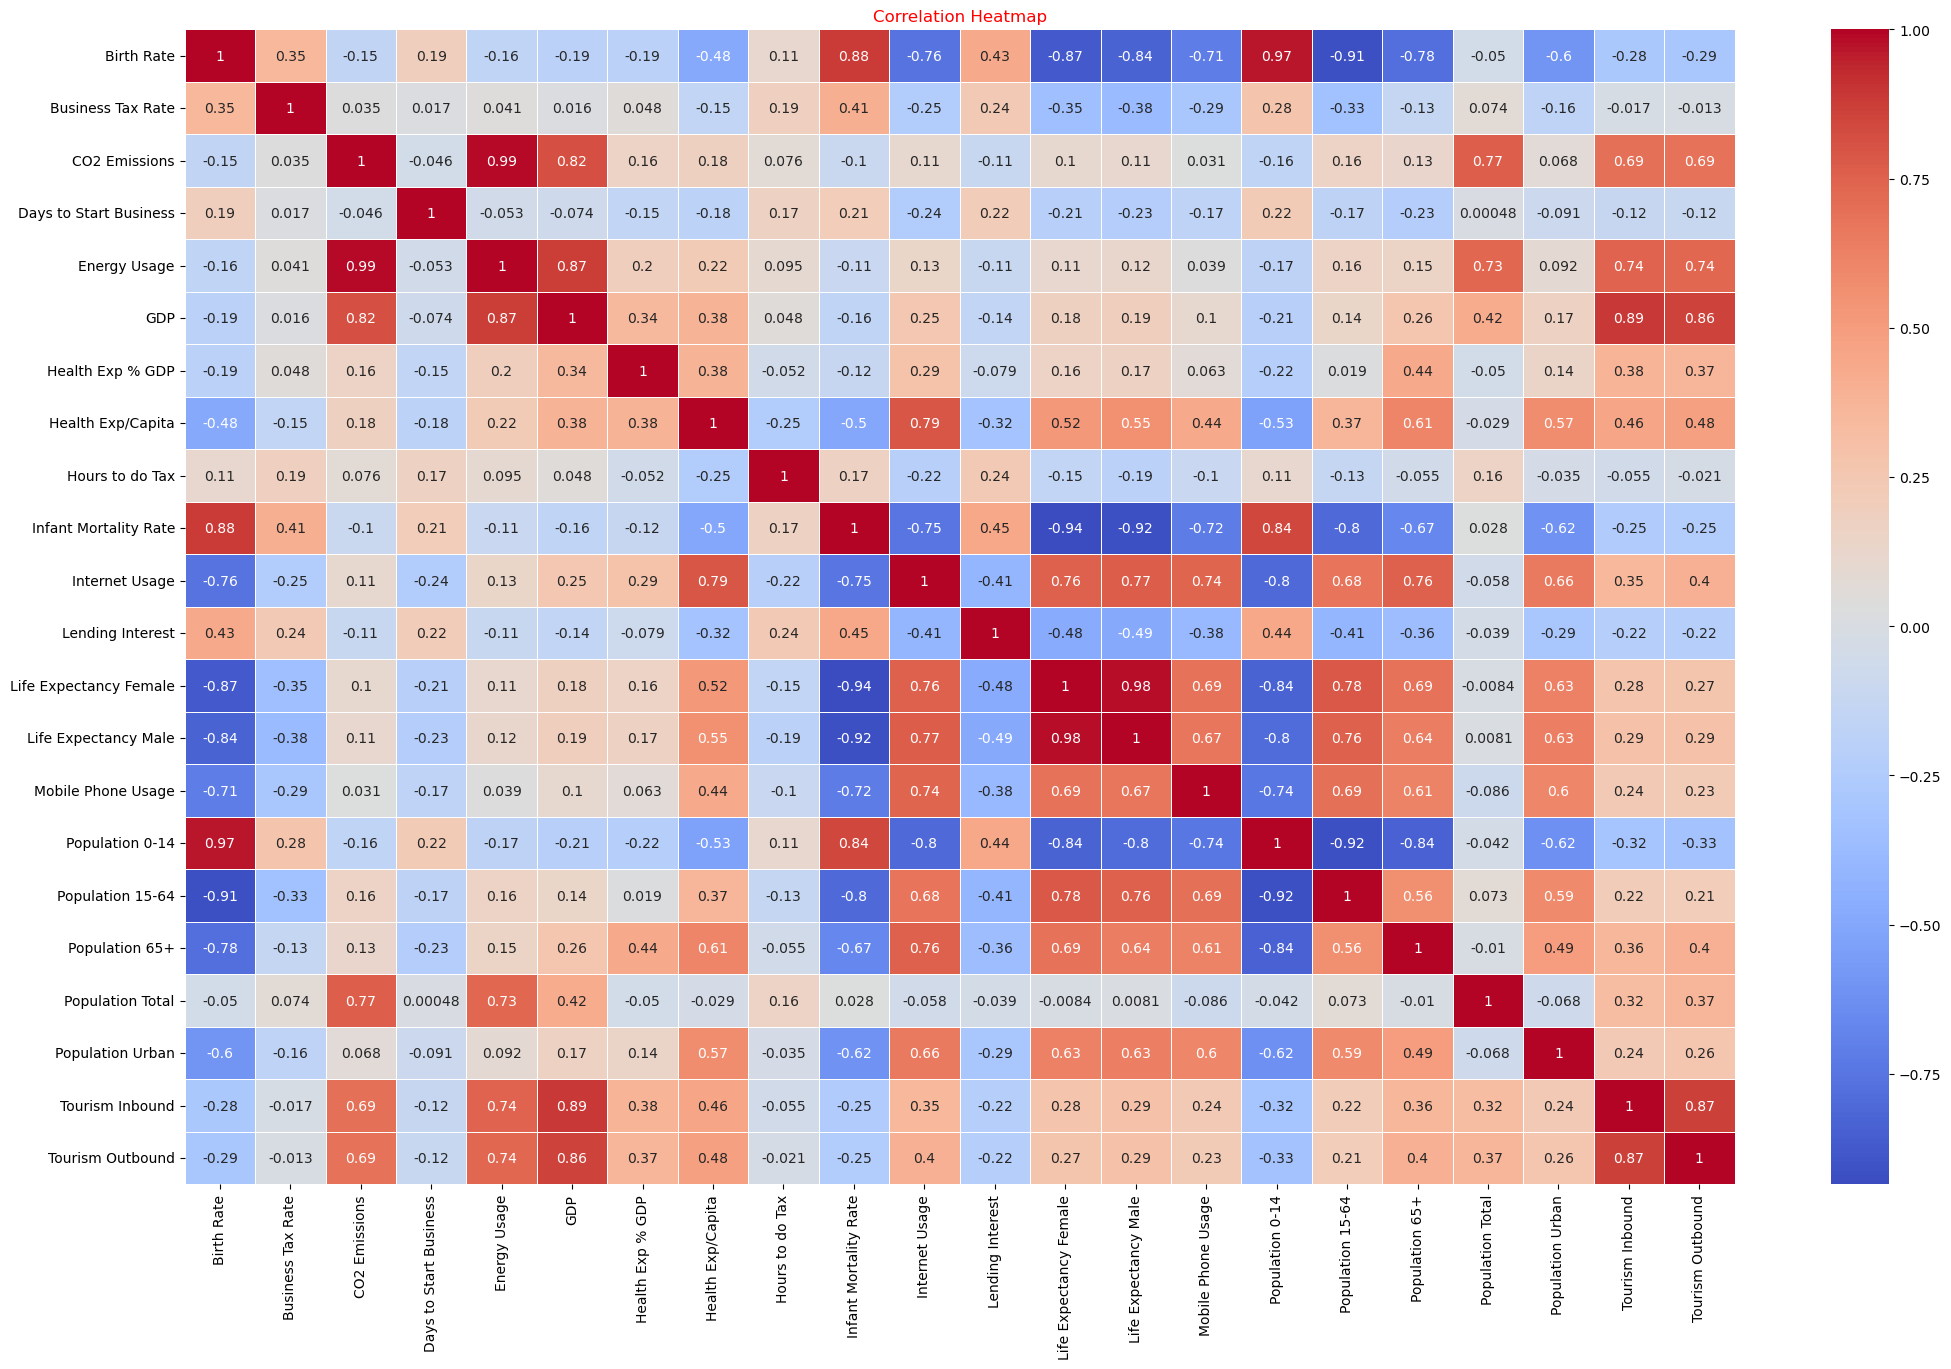

In [18]:
df_heatmap = final_df.select_dtypes(include='number')

fig=plt.figure(figsize=(25,15))
sns.heatmap(df_heatmap.corr(),linewidths=0.5,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap',fontdict={'color':'red'})
fig.savefig('Corr.jpg',dpi=500)
plt.show()

### Visualizing the data

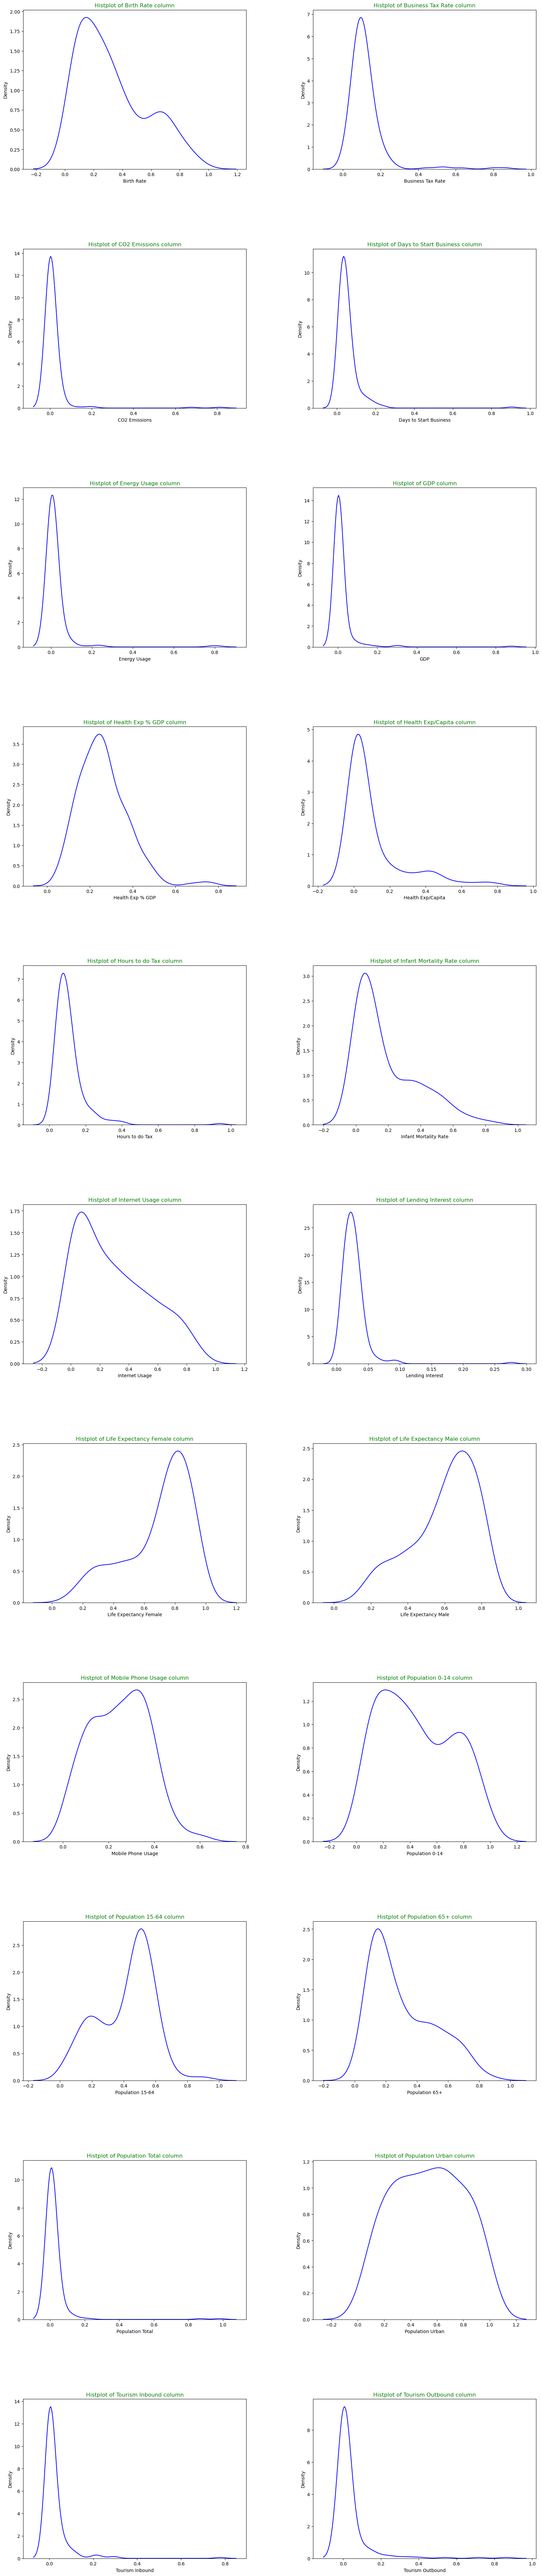

In [19]:
ddf = final_df.copy()
fig, axs = plt.subplots(11,2,sharex=False,sharey=False,figsize=(20,100))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for i in ddf.columns:
    if i != 'Country':
        x=counter//2
        y=counter%2
        sns.distplot(ddf[i],kde=True,hist=False,color='b',ax=axs[x,y])
        axs[x,y].set_title('Histplot of {} column'.format(i),fontdict={'color':'green'})
        counter+=1
#fig.savefig('dist.jpg',dpi=500)
plt.show()


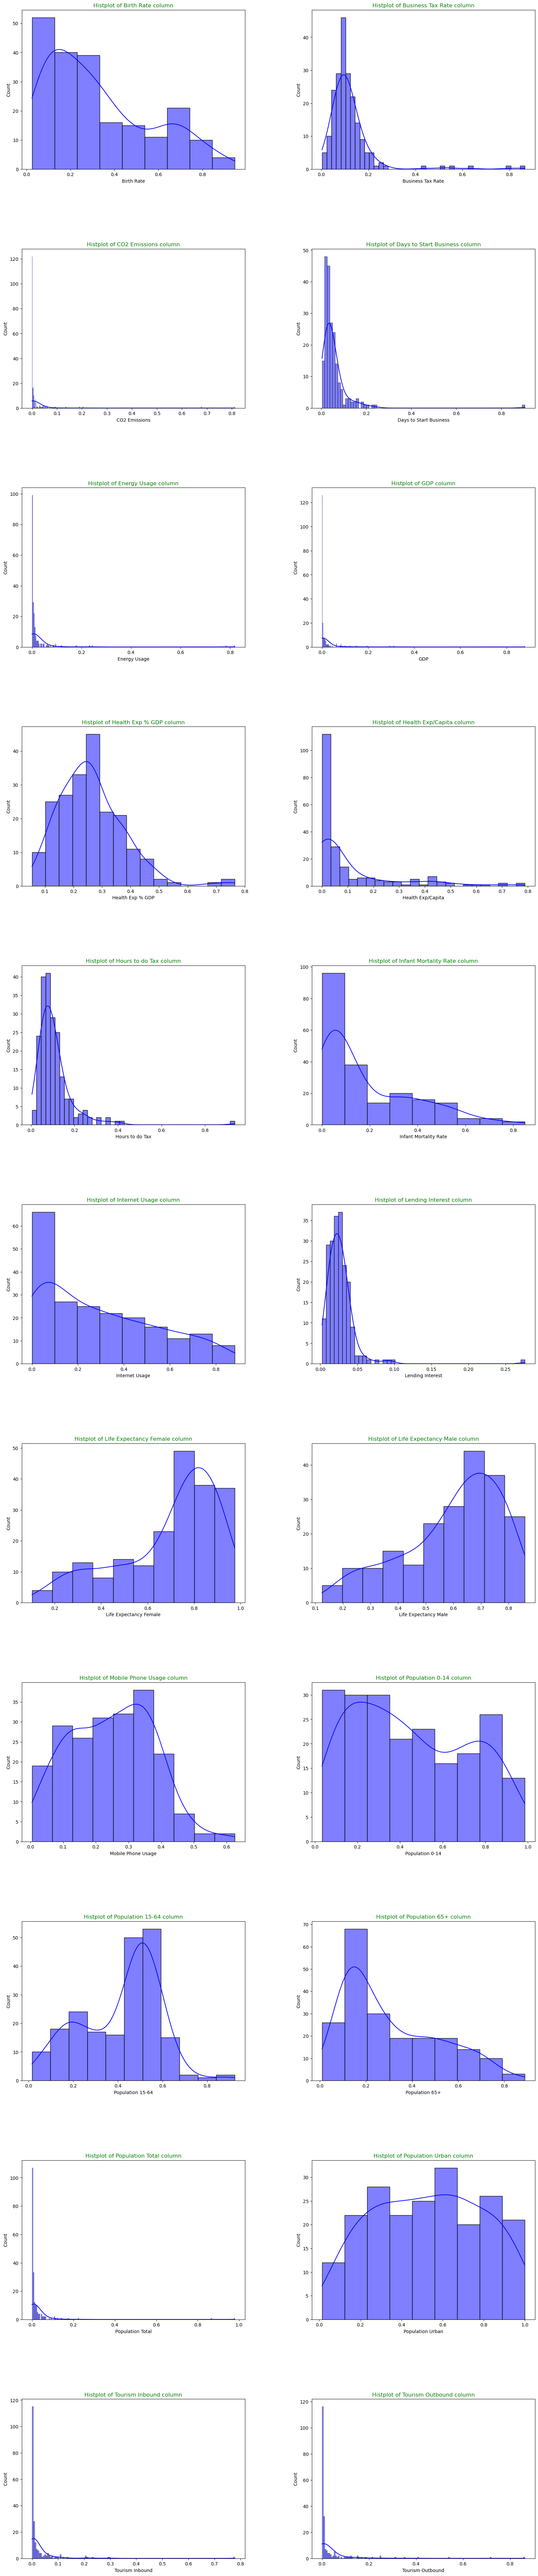

In [20]:
gdf = final_df.copy()
fig, axs = plt.subplots(11,2,sharex=False,sharey=False,figsize=(20,100))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for i in gdf.columns:
    if i != 'Country':
        x=counter//2
        y=counter%2
        sns.histplot(gdf[i],kde=True,color='b',ax=axs[x,y])
        axs[x,y].set_title('Histplot of {} column'.format(i),fontdict={'color':'green'})
        counter+=1
#fig.savefig('hist.jpg',dpi=500)
plt.show()


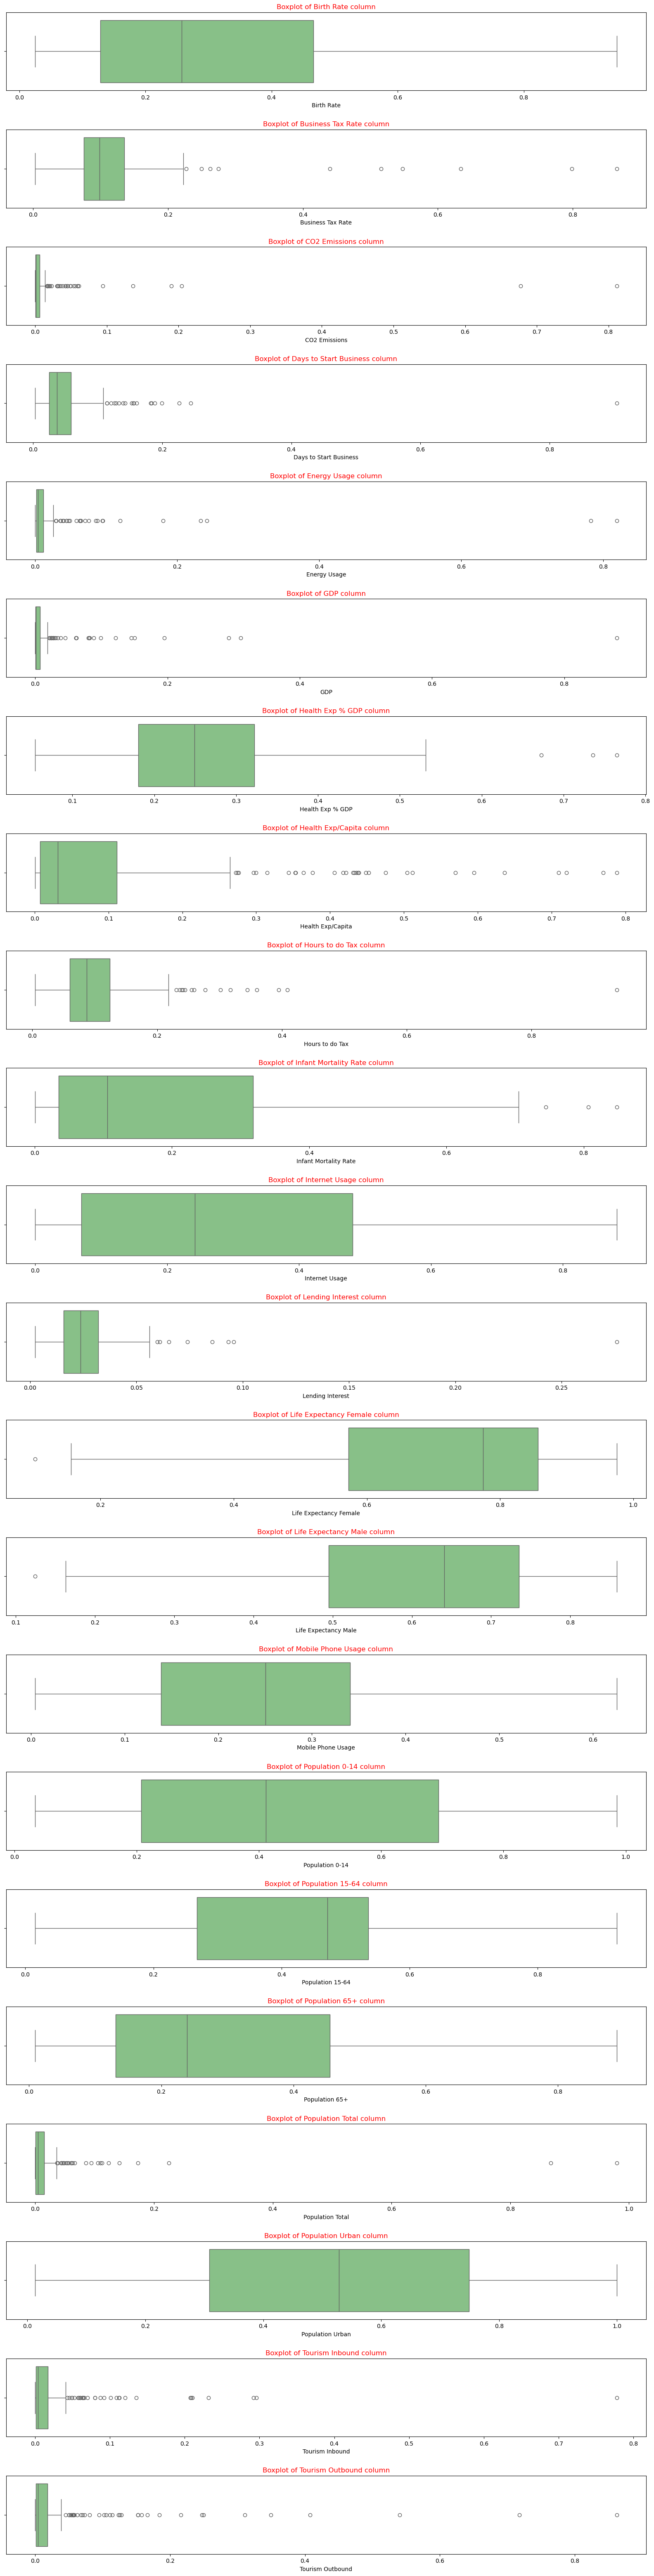

In [21]:
fig, axs = plt.subplots(22,1,sharex=False,sharey=False,figsize=(20,80))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for i in final_df.columns:
    if i != 'Country':
        sns.boxplot(x=i,data = final_df,palette = 'Accent',ax = axs[counter])
        axs[counter].set_title('Boxplot of {} column'.format(i),fontdict={'color':'red'})
        counter+=1
#fig.savefig('box.jpg',dpi=700)
plt.show()


### Top 15 Features

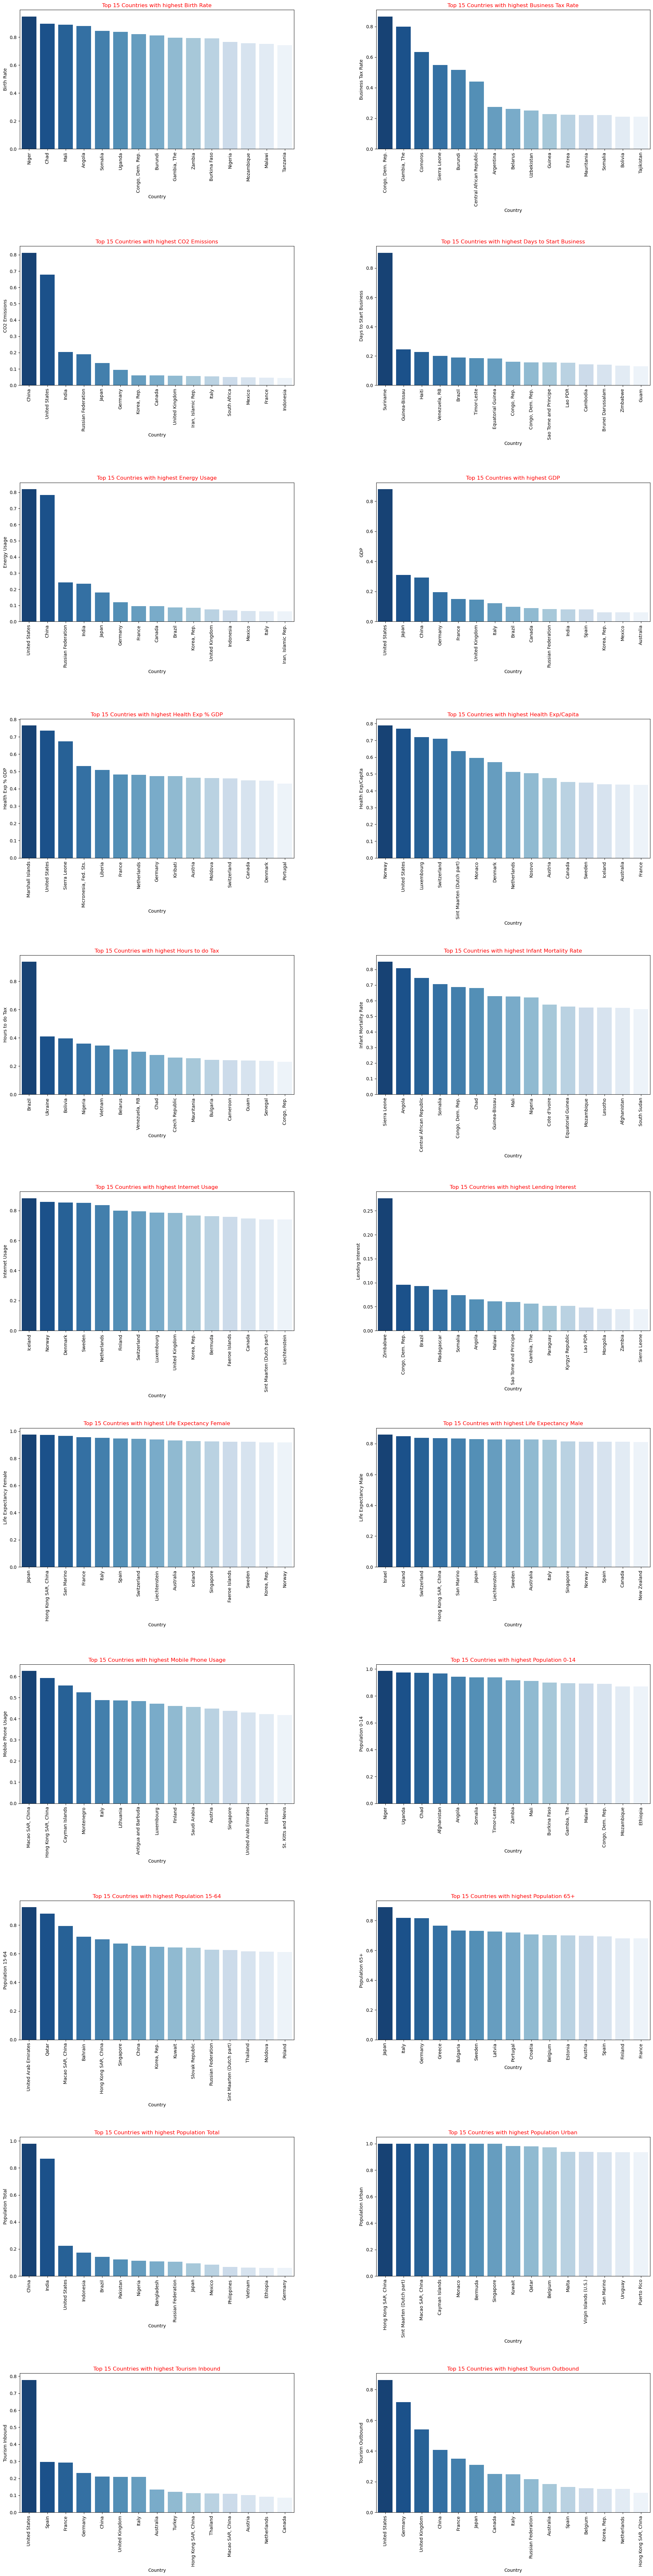

In [22]:
df4 = final_df.copy()
fig, axs = plt.subplots(11,2,sharex=False,sharey=False,figsize=(25,100))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
counter = 0
for i in df4.columns:
    if i != 'Country':
        x=counter//2
        y=counter%2
        df5 = df4.sort_values(by =i,ascending=False)
        df6 = df5.head(15)
        sns.barplot(x=df6['Country'],y=df6[i],palette='Blues_r',data=df6,ax=axs[x,y])
        axs[x,y].set_title('Top 15 Countries with highest {}'.format(i),fontdict={'color':'red'})
        for tick in axs[x,y].get_xticklabels():
                        tick.set_rotation(90)
        counter+=1
#fig.savefig('Top15.jpg',dpi=500)
plt.show()


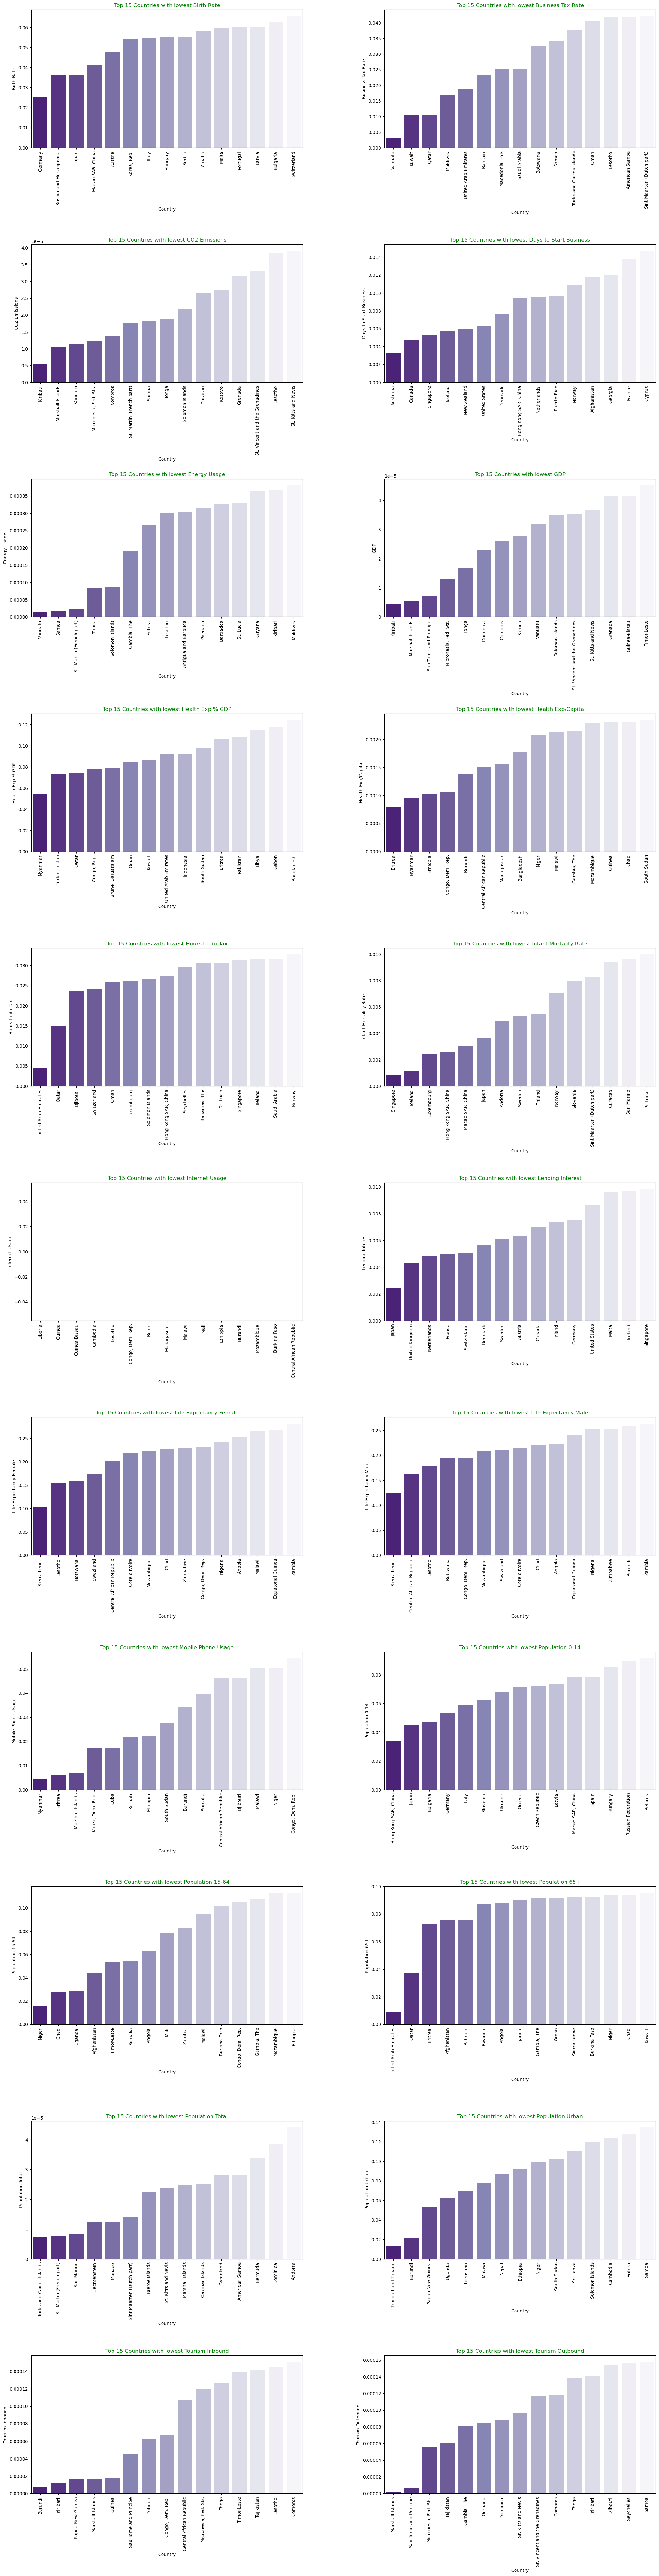

In [23]:
df4 = final_df.copy()
fig, axs = plt.subplots(11,2,sharex=False,sharey=False,figsize=(25,100))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
counter = 0
for i in df4.columns:
    if i != 'Country':
        x=counter//2
        y=counter%2
        df5 = df4.sort_values(by =i)
        df6 = df5.head(15)
        sns.barplot(x=df6['Country'],y=df6[i],palette='Purples_r',data=df6,ax=axs[x,y])
        axs[x,y].set_title('Top 15 Countries with lowest {}'.format(i),fontdict={'color':'green'})
        for tick in axs[x,y].get_xticklabels():
                        tick.set_rotation(90)
        counter+=1
#fig.savefig('Least15.jpg',dpi=500)
plt.show()


### GDP Distribution

Text(0.5, 1.0, 'Top 10 Countries based on GDP')

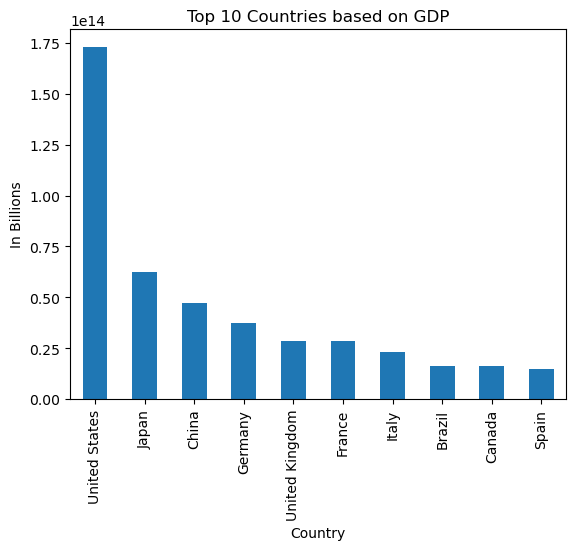

In [24]:
country_pop=df.groupby('Country')['GDP'].sum()

top_10_GDP = country_pop.nlargest(10)

df_pop_GDP=pd.Series(top_10_GDP)
df_pop_GDP.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('In Billions')
plt.title('Top 10 Countries based on GDP')

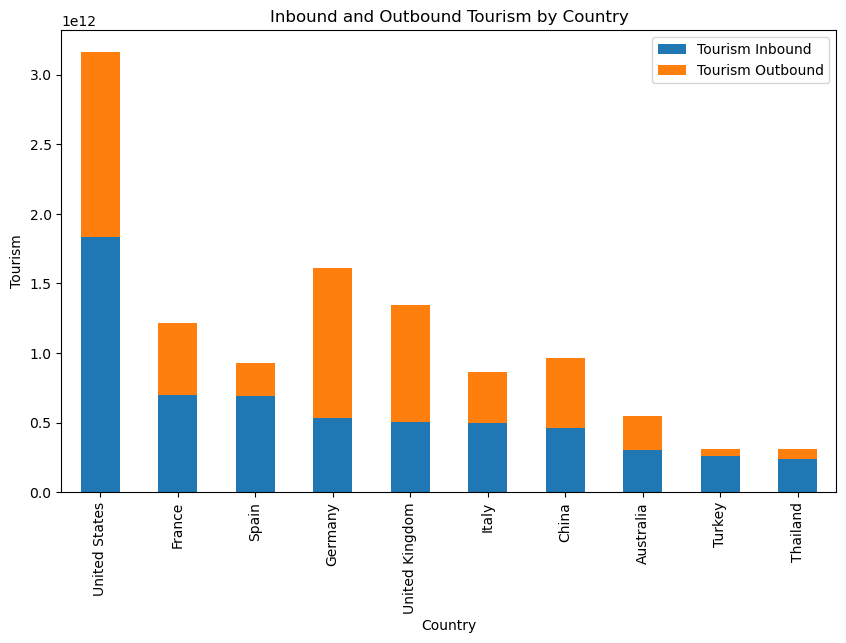

In [25]:
tourism_df = df.groupby('Country')[['Tourism Inbound', 'Tourism Outbound']].sum()
top_10_tourism_df=tourism_df.nlargest(10,columns=['Tourism Inbound'])
# Create a stacked bar chart
ax = top_10_tourism_df.sort_values(by=['Tourism Inbound'],ascending=False).plot(kind='bar', stacked=True, figsize=(10,6))

# Set the chart title and axis labels
ax.set_title('Inbound and Outbound Tourism by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Tourism')


# Show the chart
plt.show()

### Population Distribution

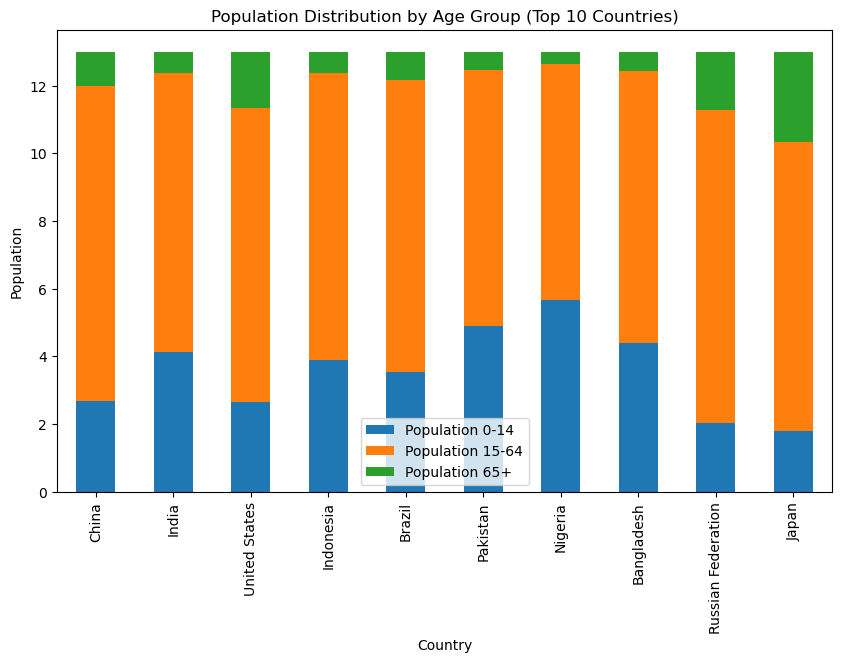

In [26]:
# Get the top 10 countries by total population
top_10 = df.groupby('Country')['Population Total'].sum().nlargest(10).index

# Group the data by country and sum the population by age group
grouped = df.groupby('Country')[['Population 0-14', 'Population 15-64', 'Population 65+']].sum()

# Filter the data to only include the top 10 countries
grouped = grouped.loc[top_10]

# Create a stacked bar chart for each country
fig, ax = plt.subplots(figsize=(10, 6))

grouped.plot(kind='bar', stacked=True, ax=ax)

# Set the chart title and axis labels
ax.set_title('Population Distribution by Age Group (Top 10 Countries)')
ax.set_xlabel('Country')
ax.set_ylabel('Population')

# Show the chart
plt.show()

In [27]:
top_10_countries = df.sort_values("GDP", ascending=False).head(10)
top_10_countries

Birth Rate  Business Tax Rate  CO2 Emissions        Country  \
2700       0.013               46.4            NaN  United States   
2492       0.013               46.5            NaN  United States   
2284       0.013               46.5      5433057.0  United States   
1868       0.014               46.4      5656839.0  United States   
1660       0.014               46.1      5828697.0  United States   
2076       0.014               46.1      5311840.0  United States   
1452       0.014               47.4      5737616.0  United States   
1244       0.014               45.8      5826394.0  United States   
1036       0.014                NaN      5790765.0  United States   
828        0.014                NaN      5681664.0  United States   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
2700                     5.0     2132446.0  1.624460e+13             0.179   
2492                     5.0     2191193.0  1.553380e+13             0.177   
2284                     5.0     2215504.0  1.495830e+13             0.177   
1868                     5.0     2277034.0  1.472030e+13             0.165   
1660                     6.0     2337014.0  1.448030e+13             0.161   
2076                     5.0     2164458.0  1.441790e+13             0.177   
1452                     6.0     2296686.0  1.385790e+13             0.159   
1244                     6.0     2318861.0  1.309540e+13             0.158   
1036                     6.0     2307819.0  1.227700e+13             0.157   
828                      6.0     2261151.0  1.151220e+13             0.156   

      Health Exp/Capita  Hours to do Tax  Infant Mortality Rate  \
2700             8895.0            175.0                  0.006   
2492             8467.0            187.0                  0.006   
2284             8254.0            187.0                  0.006   
1868             7769.0            187.0                  0.007   
1660             7486.0            325.0                  0.007   
2076             8009.0            187.0                  0.006   
1452             7110.0            325.0                  0.007   
1244             6732.0            325.0                  0.007   
1036             6355.0              NaN                  0.007   
828              5993.0              NaN                  0.007   

      Internet Usage  Lending Interest  Life Expectancy Female  \
2700             0.8             0.033                    81.0   
2492             0.7             0.033                    81.0   
2284             0.7             0.033                    81.0   
1868             0.7             0.051                    81.0   
1660             0.8             0.081                    80.0   
2076             0.7             0.033                    81.0   
1452             0.7             0.080                    80.0   
1244             0.7             0.062                    80.0   
1036             0.6             0.043                    80.0   
828              0.6             0.041                    80.0   

      Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
2700                  76.0                 1.0            0.196   
2492                  76.0                 0.9            0.197   
2284                  76.0                 0.9            0.198   
1868                  76.0                 0.9            0.201   
1660                  75.0                 0.8            0.202   
2076                  76.0                 0.9            0.200   
1452                  75.0                 0.8            0.204   
1244                  75.0                 0.7            0.205   
1036                  75.0                 0.6            0.207   
828                   75.0                 0.5            0.209   

      Population 15-64  Population 65+  Population Total  Population Urban  \
2700             0.667           0.136         313873685             0.811   
2492             0.669      

In [28]:
pop_df=df.groupby('Country').sum()[['Population Total','Population 0-14','Population 15-64','Population 65+','GDP']].nlargest(10,'Population Total')
pop_df

Population Total  Population 0-14  Population 15-64  \
Country                                                                   
China                    17020440000            2.684             9.303   
India                    14840677489            4.134             8.244   
United States             3878445547            2.654             8.702   
Indonesia                 2961622996            3.901             8.464   
Brazil                    2436961595            3.527             8.651   
Pakistan                  2096337537            4.908             7.552   
Nigeria                   1876067490            5.683             6.961   
Bangladesh                1875157358            4.392             8.041   
Russian Federation        1866571740            2.040             9.237   
Japan                     1658333973            1.788             8.538   

                    Population 65+           GDP  
Country                                           
China                        1.013  4.700757e+13  
India                        0.622  1.389328e+13  
United States                1.643  1.729929e+14  
Indonesia                    0.636  5.577060e+12  
Brazil                       0.822  1.639890e+13  
Pakistan                     0.541  1.752628e+12  
Nigeria                      0.355  2.350603e+12  
Bangladesh                   0.569  9.379630e+11  
Russian Federation           1.723  1.331709e+13  
Japan                        2.674  6.233870e+13

In [29]:
pop_0_14_count=[p*t for p,t in zip(pop_df['Population 0-14'],pop_df['Population Total'])]
pop_15_65_count=[p*t for p,t in zip(pop_df['Population 15-64'],pop_df['Population Total'])]
pop_65plus_count=[p*t for p,t in zip(pop_df['Population 65+'],pop_df['Population Total'])]

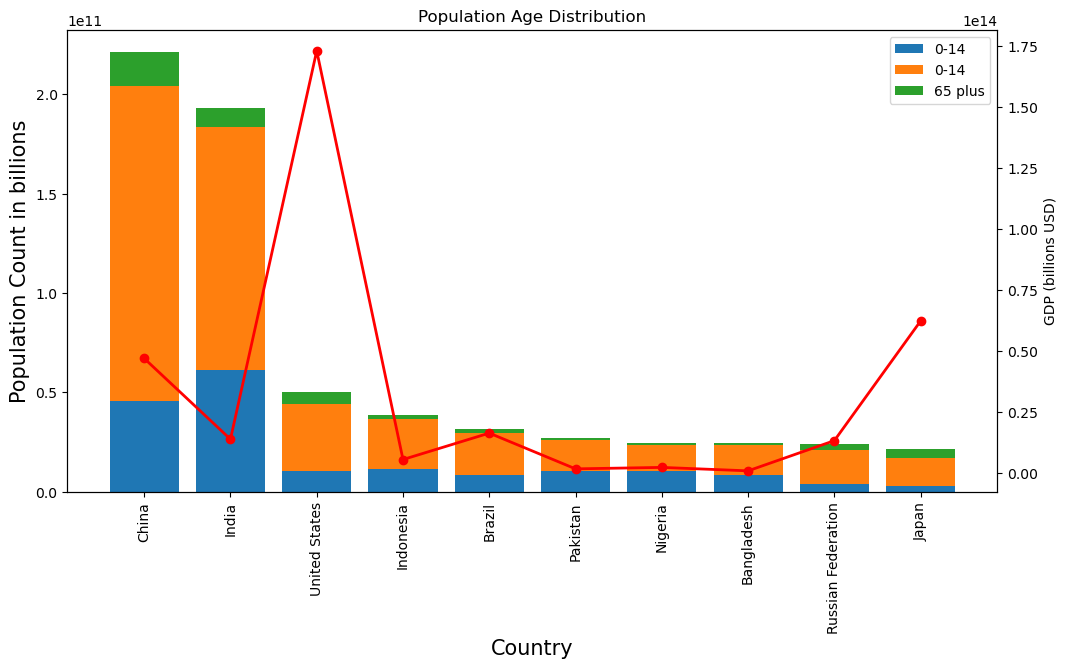

<Figure size 640x480 with 0 Axes>

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(pop_df.index,pop_0_14_count,label='0-14')
ax.bar(pop_df.index,pop_15_65_count,bottom=pop_0_14_count,label='0-14')
ax.bar(pop_df.index,pop_65plus_count,bottom=[sum(x) for x in zip(pop_0_14_count,pop_15_65_count)],label='65 plus')
ax.set_xlabel('Country',fontsize=15)
plt.xticks(rotation=90)
# create a second y-axis for GDP data
ax2 = ax.twinx()
ax2.plot(pop_df.index, pop_df['GDP'], color='red', marker='o', linewidth=2, label='GDP')
ax2.set_ylabel('GDP (billions USD)')

ax.set_ylabel('Population Count in billions',fontsize=15)
ax.set_title('Population Age Distribution')
ax.legend()
plt.show()
plt.tight_layout()

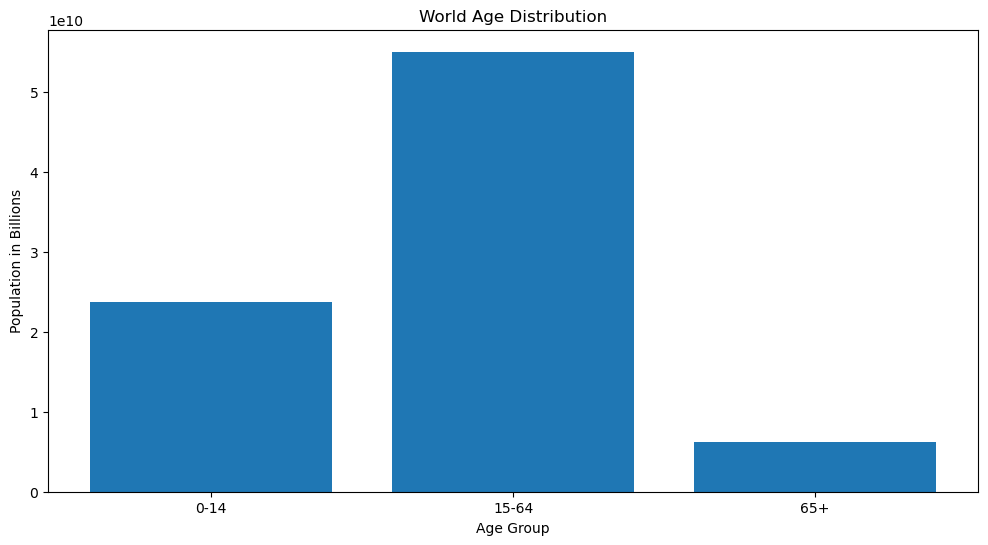

In [31]:
# calculate total population in each age group
pop_0_14_total = (df['Population Total'] * df['Population 0-14']).sum()
pop_15_64_total = (df['Population Total'] * df['Population 15-64']).sum()
pop_65_plus_total = (df['Population Total'] * df['Population 65+']).sum()

# create a bar chart of age distribution
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(['0-14', '15-64', '65+'], [pop_0_14_total, pop_15_64_total, pop_65_plus_total])
ax.set_xlabel('Age Group')
ax.set_ylabel('Population in Billions')
ax.set_title('World Age Distribution')
plt.show()


### Energy Use

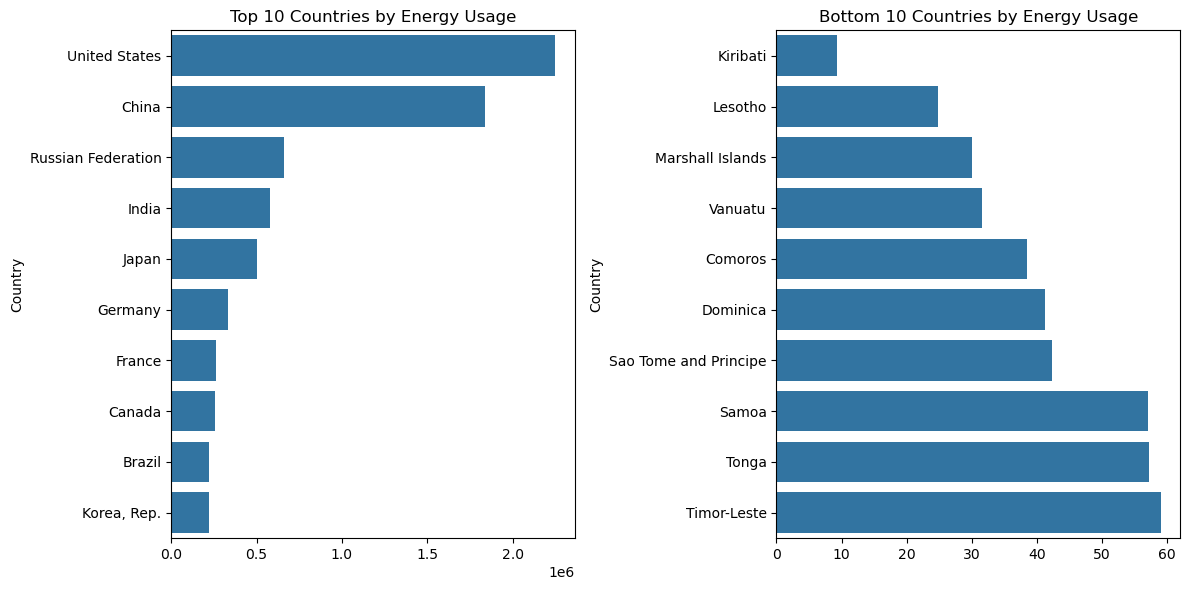

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

gp = df.groupby('Country')['Energy Usage'].mean().nlargest(10)
gp1 = df.groupby('Country')['Energy Usage'].mean().nsmallest(10)

sns.barplot(x=gp.values, y=gp.index, ax=axes[0])
sns.barplot(x=gp1.values, y=gp1.index, ax=axes[1])

axes[0].set_title('Top 10 Countries by Energy Usage')
axes[1].set_title('Bottom 10 Countries by Energy Usage')

plt.tight_layout()

### Tourism

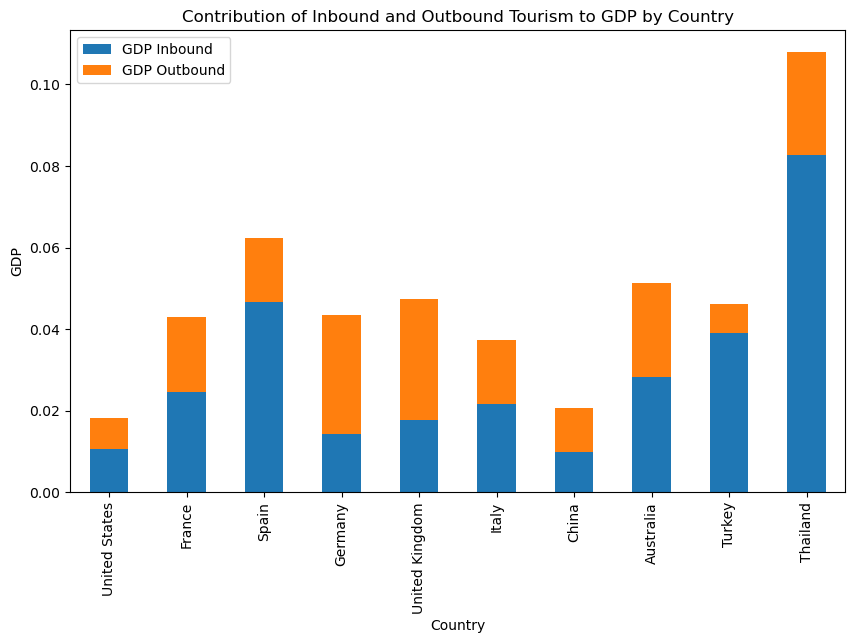

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the top 10 countries by inbound tourism
tourism_df = df.groupby('Country')[['Tourism Inbound', 'Tourism Outbound', 'GDP']].sum()
top_10_tourism_df = tourism_df.nlargest(10, columns=['Tourism Inbound'])

# Calculate the contribution of inbound and outbound tourism to GDP
top_10_tourism_df['GDP Inbound'] = top_10_tourism_df['Tourism Inbound'] / top_10_tourism_df['GDP']
top_10_tourism_df['GDP Outbound'] = top_10_tourism_df['Tourism Outbound'] / top_10_tourism_df['GDP']

# Create a stacked bar chart showing the contribution of inbound and outbound tourism to GDP
ax = top_10_tourism_df[['GDP Inbound', 'GDP Outbound']].plot(kind='bar', stacked=True, figsize=(10,6))

# Set the chart title and axis labels
ax.set_title('Contribution of Inbound and Outbound Tourism to GDP by Country')
ax.set_xlabel('Country')
ax.set_ylabel('GDP')

# Show the chart
plt.show()


### Pollution

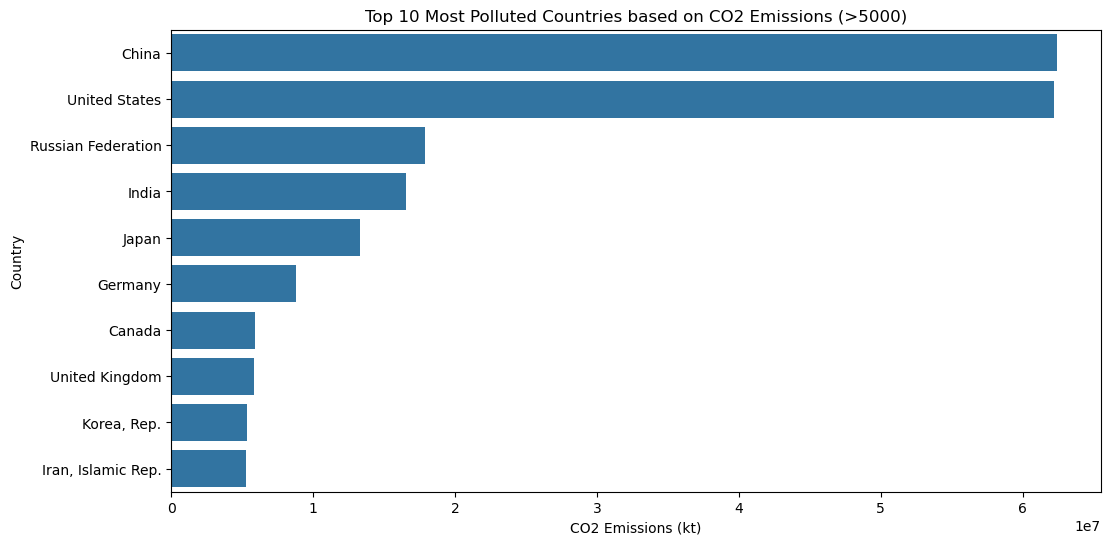

In [34]:
# Subset the DataFrame to include only countries with CO2 emissions above 5000
polluted_df = df[df['CO2 Emissions'] > 5000]

# Group the DataFrame by country and sum the CO2 emissions
polluted_df = polluted_df.groupby('Country')[['CO2 Emissions','Energy Usage']].sum().nlargest(10,'CO2 Emissions')

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='CO2 Emissions', y=polluted_df.index, data=polluted_df)

# Set the chart title and axis labels
ax.set_title('Top 10 Most Polluted Countries based on CO2 Emissions (>5000)')
ax.set_xlabel('CO2 Emissions (kt)')
ax.set_ylabel('Country')


# Show the chart
plt.show()


## Dimensionality Reduction - PCA

In [35]:
!pip install bioinfokit

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59335 sha256=b78079622f67f34b987ee4acca9d290cb388eb3ec81418c078b2af59f8cf20ed
  Stored in directory: c:\users\saadf\appdata\local\pip\cache\wheels\b4\76\43\7fa2c349dac62f041fe8d85c9f48e47ca25fc39fd79d0b5f5e
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45437 sha256=8596ce71f98ee16cdc2e5f0417e1ff5216023ac32aa9836a67ed516c80e7571e
  Stored in directory: c:\users\saadf\appdata\local\pip\cache\wheels\c2\47\0c\f014c55a1cfd56dce41a1cafd23e3c59065

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [37]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(final_df.iloc[:,1:]),columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16','PCA17','PCA18','PCA19','PCA20','PCA21','PCA22'])

In [38]:
pca_df.head(10)

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  1.005212  0.141537 -0.100866 -0.115094  0.131577 -0.079093 -0.052618   
1 -0.217874 -0.250431 -0.031709 -0.012559  0.014370 -0.076223  0.020050   
2  0.067427 -0.116256  0.196313  0.171695 -0.055805 -0.008603  0.024531   
3 -0.513874  0.176063  0.167303 -0.049556  0.072729  0.018557 -0.068837   
4 -0.643922  0.148853  0.129608 -0.081245  0.034744 -0.005212  0.025852   
5  1.166577  0.335445  0.012369 -0.071422 -0.114115  0.157205  0.057184   
6 -0.122425 -0.308237 -0.120358 -0.134596  0.171288  0.122386  0.125808   
7 -0.356614  0.125032  0.168347  0.085523 -0.132425 -0.180731  0.108728   
8 -0.243262 -0.231114  0.058441  0.077071 -0.153268 -0.091957  0.002019   
9 -0.356369 -0.262694 -0.105731 -0.100873  0.005911  0.129504  0.036827   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0 -0.057070  0.055618  0.041083  0.101061 -0.012126 -0.019538  0.085894   
1  0.015336 -0.007934  0.014422 -0.007191 -0.029725 -0.035816  0.017567   
2  0.064943  0.006311 -0.025801 -0.045717 -0.055133  0.041542  0.028716   
3  0.050104 -0.094733  0.048501  0.013774  0.012061 -0.028423 -0.039910   
4  0.060854 -0.069250  0.017037  0.051873 -0.002980 -0.040667 -0.079377   
5 -0.071687 -0.031620 -0.048114  0.017505  0.033706 -0.135740  0.141966   
6 -0.070092  0.124294 -0.000217 -0.024834  0.029202  0.101177  0.033551   
7  0.025289  0.112115 -0.007834  0.030562  0.045179  0.034214 -0.011433   
8 -0.017483 -0.080599 -0.041858 -0.028668 -0.085150 -0.023361  0.020029   
9 -0.015983  0.070421  0.026072  0.011014  0.008809  0.000530  0.003795   

      PCA15     PCA16     PCA17     PCA18     PCA19     PCA20     PCA21  \
0 -0.022136 -0.038076 -0.014758 -0.018435 -0.006186 -0.004492  0.001046   
1 -0.030546 -0.036403 -0.005991  0.005366  0.002855 -0.003569 -0.001413   
2  0.038763  0.039736 -0.002317  0.034164 -0.008087  0.012528 -0.001891   
3  0.035997  0.016513  0.005611 -0.021450  0.005399 -0.006630 -0.002478   
4 -0.047918 -0.070248 -0.001284 -0.007353 -0.010323 -0.001124  0.010571   
5  0.043503 -0.044895 -0.011353 -0.029379  0.023532 -0.004475 -0.003174   
6 -0.022226 -0.020465 -0.016276  0.015341  0.004470  0.008519  0.000704   
7 -0.031361 -0.017166 -0.009187 -0.013568  0.001406  0.008578  0.000561   
8  0.012400 -0.010251 -0.004462  0.008688  0.013211 -0.000313 -0.001737   
9 -0.033159 -0.044981 -0.003998  0.017222  0.001523  0.003063  0.005901   

      PCA22  
0 -0.000095  
1  0.000075  
2  0.000126  
3  0.000047  
4 -0.000050  
5  0.000058  
6 -0.000043  
7 -0.000570  
8 -0.000186  
9 -0.000312

In [39]:
var = pca.explained_variance_ratio_
variance = np.cumsum(np.round(var,decimals = 4)*100)
variance

array([66.41, 73.89, 80.43, 85.  , 88.64, 91.12, 92.77, 94.16, 95.35,
       96.38, 97.26, 98.01, 98.62, 99.14, 99.42, 99.67, 99.79, 99.88,
       99.94, 99.99, 99.99, 99.99])

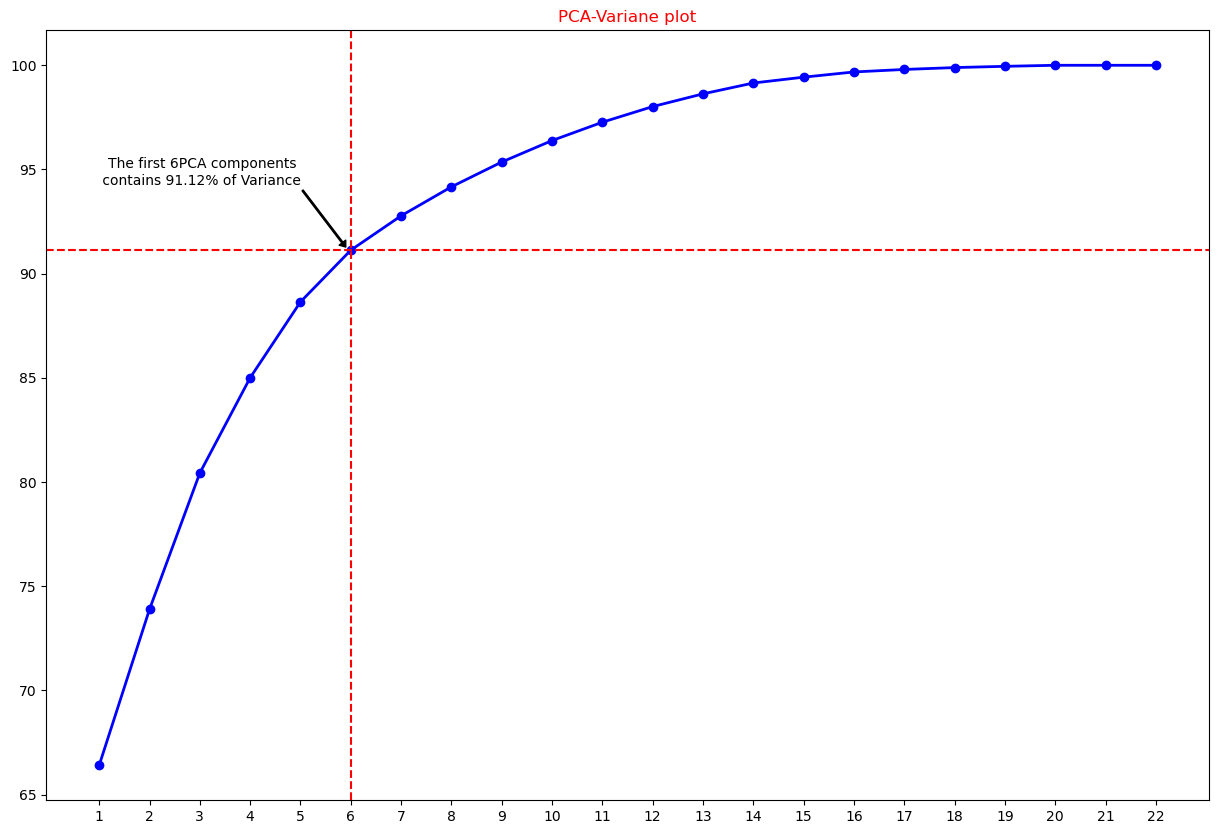

In [40]:
fig = plt.figure(figsize=(15,10))
plt.plot(np.arange(pca.n_components_) + 1,variance,marker='o', linewidth=2, color='blue')
plt.xticks(np.arange(pca.n_components_)+1)
plt.axvline(x=6,animated=True,color='red',linestyle='--')
plt.axhline(y=91.12,animated=True,color='red',linestyle='--')
x=6
y=91.12
plt.annotate("The first 6PCA components \n contains 91.12% of Variance",
             xy=(x-0.1, y+0.15), xytext=(x-1,y+3), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='right', verticalalignment='bottom')
fig.savefig('PCA.jpg',dpi=500)
plt.title('PCA-Variane plot',fontdict={'color':'red'})
plt.show()

In [41]:
data_tsne_2 = TSNE(n_components=2,random_state=21).fit_transform(final_df.iloc[:,1:])

In [42]:
data_tsne_2 = pd.DataFrame(data_tsne_2)

In [43]:
data_tsne_3 = TSNE(n_components=3,random_state=21).fit_transform(final_df.iloc[:,1:])

In [44]:
data_tsne_3 = pd.DataFrame(data_tsne_3)

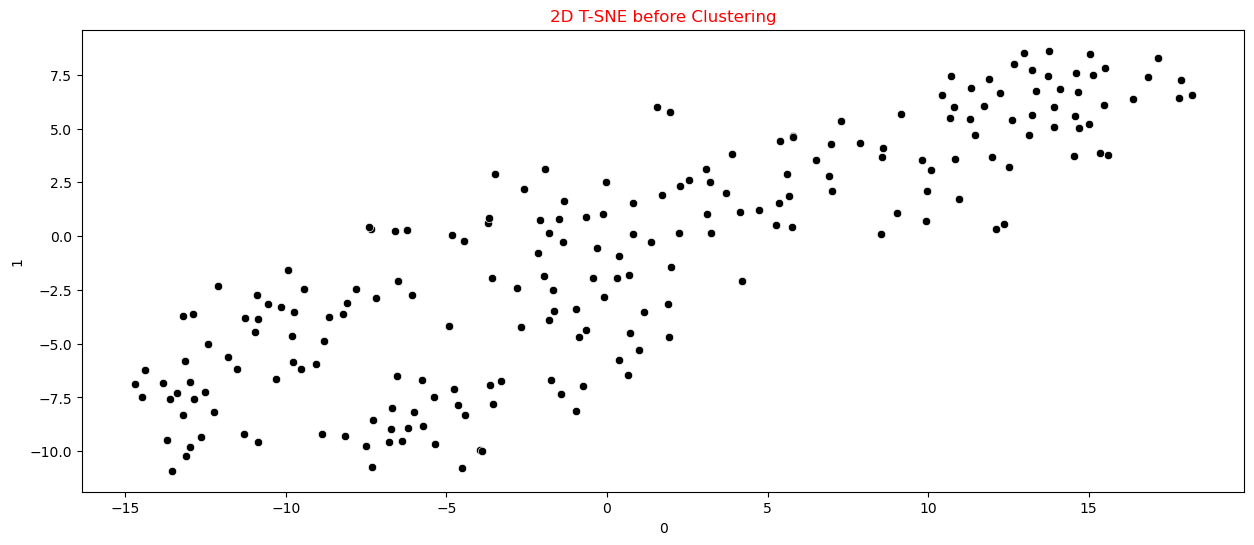

In [45]:
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0],y=data_tsne_2.iloc[:,1],color='black')
plt.title('2D T-SNE before Clustering',fontdict={'color':'red'})
fig.savefig('TSNE-2D.jpg')
plt.show()

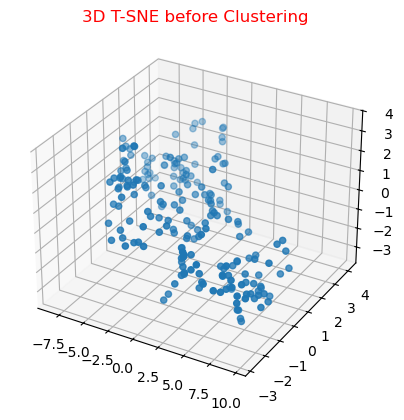

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne_3.iloc[:,0], data_tsne_3.iloc[:,1], data_tsne_3.iloc[:,2])
plt.title('3D T-SNE before Clustering',fontdict={'color':'red'})
plt.show()
fig.savefig('TSNE-3D.jpg',dpi=400)

# Model Building

## Agglomerative & Heirarchical Clustering

### Agglomerative

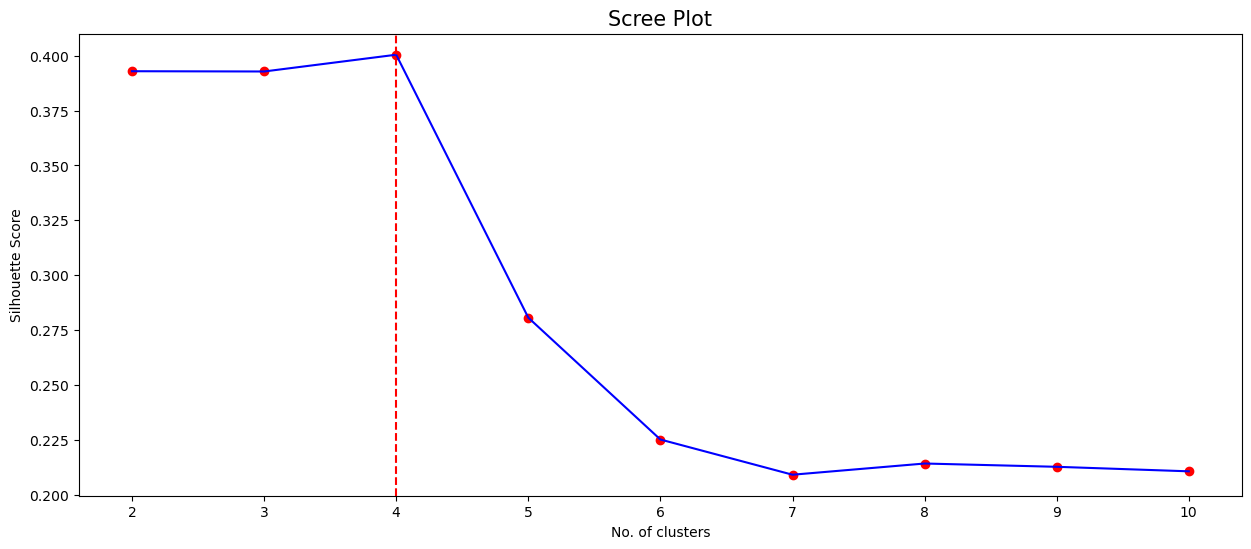

The maximum silhouette score obtained for n_clusters = 4
 and the Silhouette_score is : 0.40041943185526235


In [49]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

nc = range(2, 11)
sc_score = []

for i in nc:
    clusterer = AgglomerativeClustering(
        n_clusters=i,
        metric='euclidean',   # replaced 'affinity' with 'metric'
        linkage='complete'
    )
    y = clusterer.fit_predict(final_df.iloc[:, 1:])
    silhouette_avg = silhouette_score(final_df.iloc[:, 1:], y)
    sc_score.append(silhouette_avg)

plt.figure(figsize=(15, 6))
plt.title('Scree Plot', fontsize=15)
plt.xlabel('No. of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.plot(nc, sc_score, color="blue")
plt.axvline(x=nc[np.argmax(sc_score)], linestyle='--', c='red')
plt.scatter(nc, sc_score, color="red")
plt.show()

print("The maximum silhouette score obtained for n_clusters = {}\n and the Silhouette_score is : {}".format(
    nc[np.argmax(sc_score)],
    np.max(sc_score)
))


### Heirarchical

In [50]:
h_clusterer = AgglomerativeClustering(n_clusters= 4 , affinity='euclidean', linkage='complete')
h_labels = h_clusterer.fit_predict(final_df.iloc[:,1:])

silhouette_avg = silhouette_score(final_df.iloc[:,1:], h_labels)
print('Silhoutte Scored is {}'.format(silhouette_avg))

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

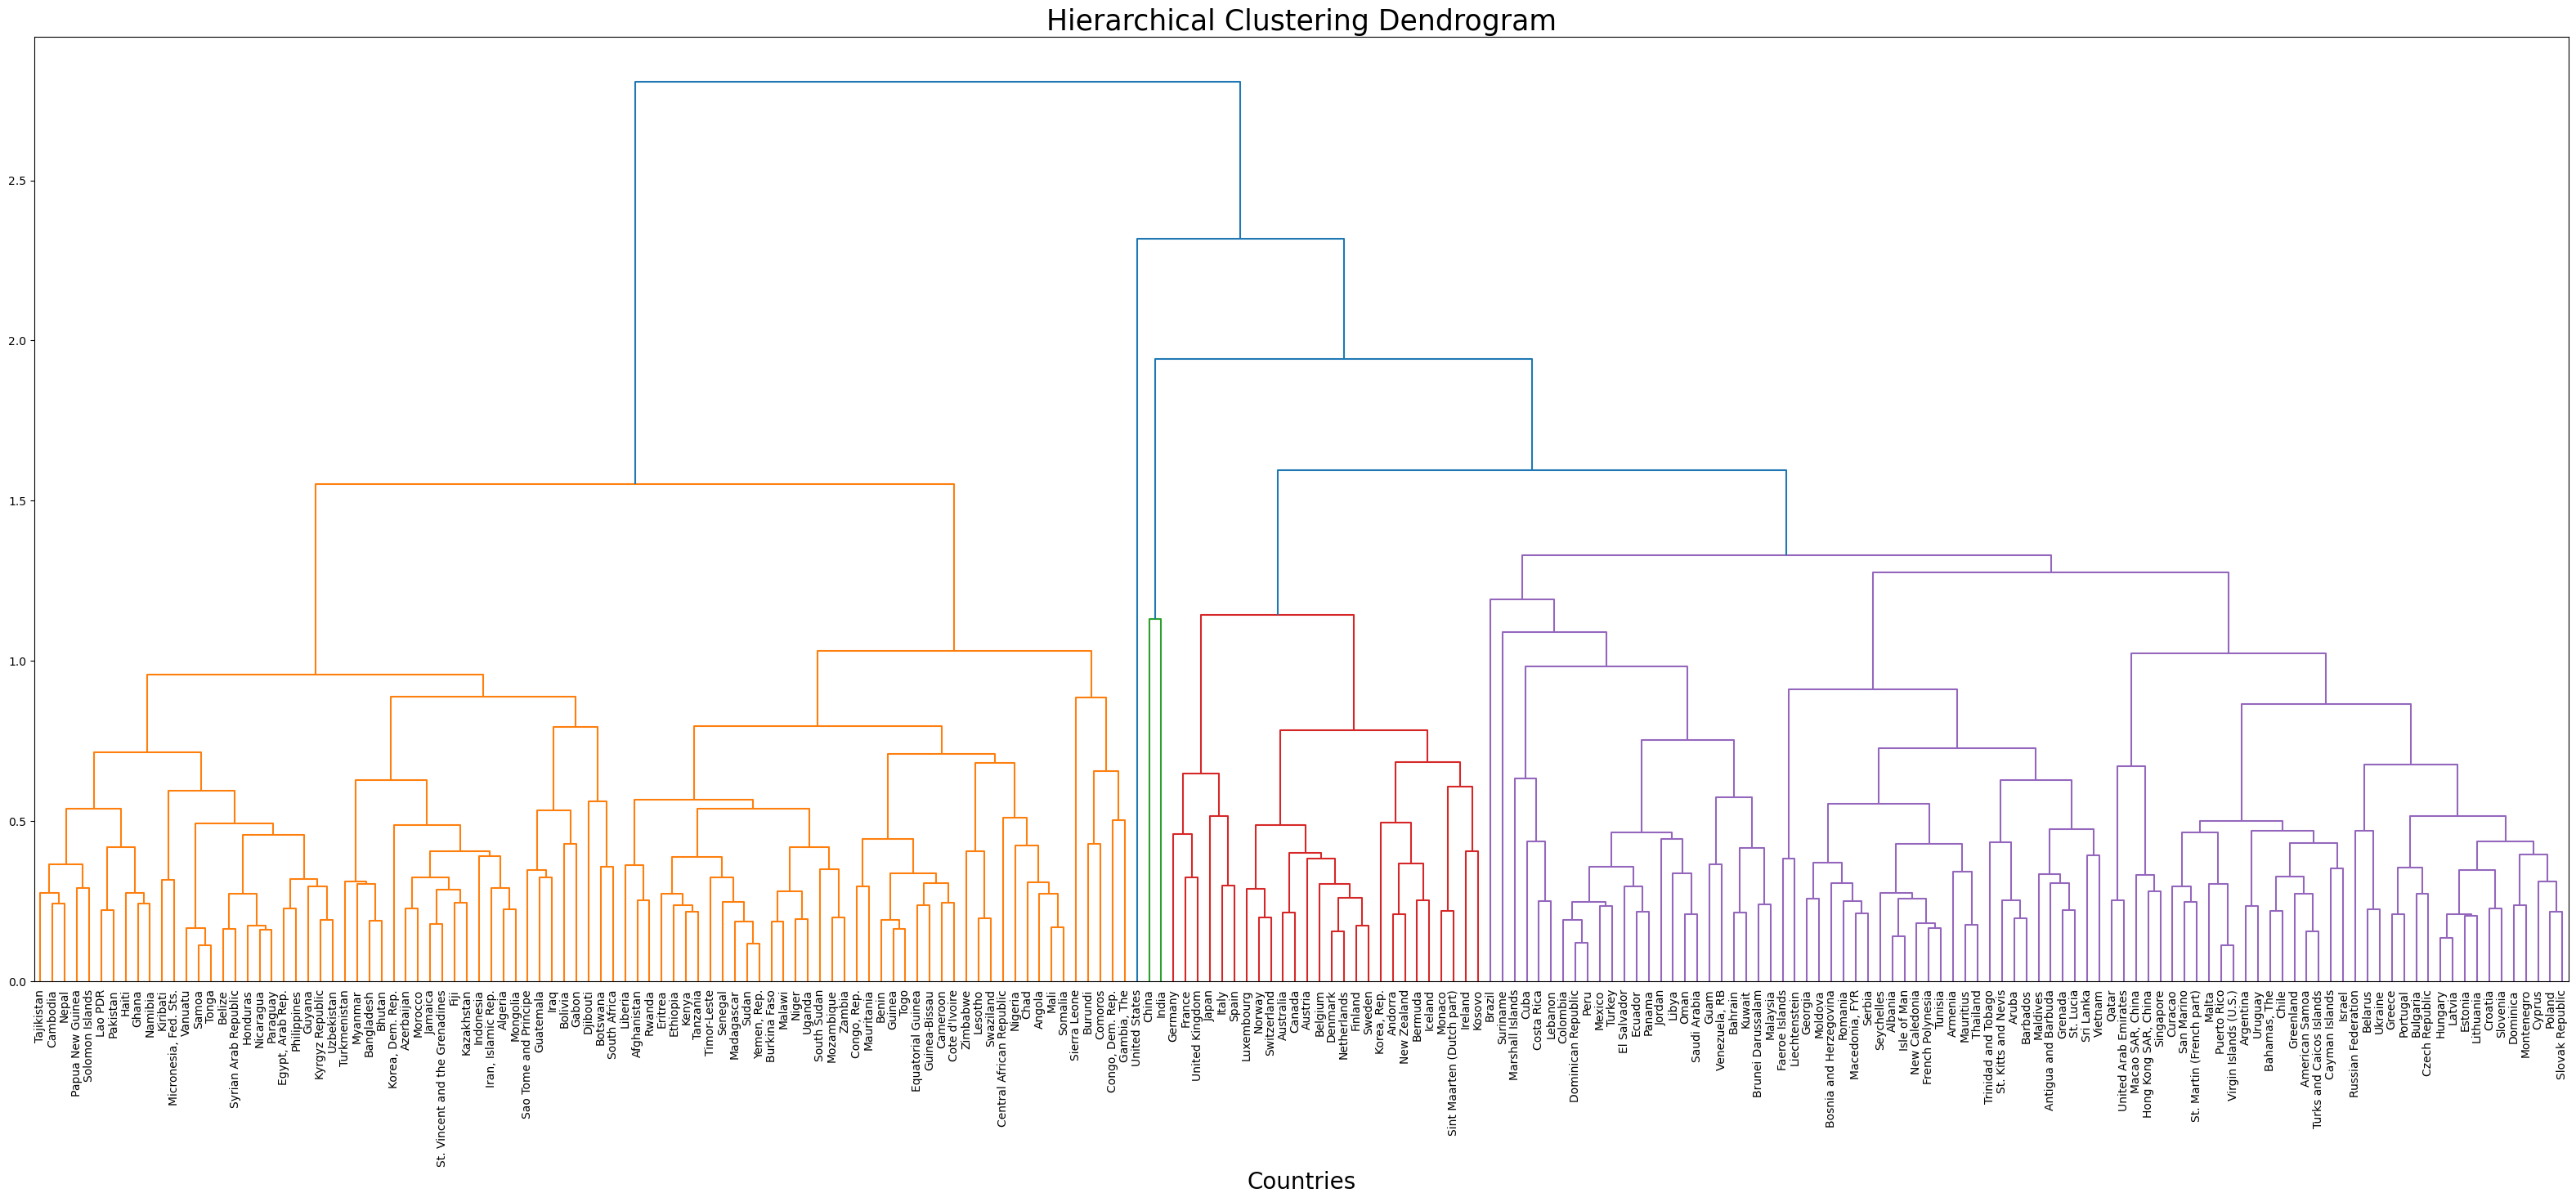

In [51]:
fig = plt.figure(figsize=(40,15))
plt.title('Hierarchical Clustering Dendrogram',fontsize=25)
plt.xlabel('Countries',fontsize= 20)
dendrogram = sch.dendrogram(sch.linkage(final_df.iloc[:,1:], method='complete'),orientation='top',labels=final_df.set_index('Country').index, leaf_font_size=10, color_threshold=sch.linkage(final_df.iloc[:,1:], method='complete')[-4, 2])
plt.show()
fig.savefig('Dendrogram.jpg',dpi=400)

## K-Means Clustering

In [52]:
final_df_encoded = final_df.drop(columns=['Country'])

final_df_encoded

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0      0.732860           0.087270       0.000487                0.011711   
1      0.145871           0.096882       0.000571                0.026595   
2      0.353293           0.176565       0.013335                0.036536   
3      0.223990           0.041901       0.000515                0.079653   
4      0.090352           0.116982       0.000051                0.019661   
..          ...                ...            ...                     ...   
203    0.209030           0.089237       0.012901                0.058706   
204    0.115963           0.137745       0.000208                0.016422   
205    0.577631           0.146811       0.002413                0.050622   
206    0.793736           0.065660       0.000278                0.041010   
207    0.543478           0.103257       0.001231                0.133064   

     Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0        0.005992  0.000738          0.380191           0.003300   
1        0.000772  0.000651          0.242304           0.020066   
2        0.013600  0.008957          0.149851           0.016716   
3        0.002114  0.001177          0.291671           0.314744   
4        0.020661  0.007203          0.268345           0.274809   
..            ...       ...               ...                ...   
203      0.017648  0.006019          0.257246           0.006458   
204      0.012143  0.002810          0.269679           0.164183   
205      0.002794  0.001545          0.194169           0.005615   
206      0.002919  0.000814          0.257444           0.006422   
207      0.003631  0.000482          0.264520           0.009457   

     Hours to do Tax  Infant Mortality Rate  Internet Usage  Lending Interest  \
0           0.103053               0.554223        0.026183          0.031482   
1           0.133372               0.102656        0.292308          0.025395   
2           0.154795               0.170704        0.097041          0.015315   
3           0.072384               0.034826        0.560651          0.027967   
4           0.074115               0.004959        0.644822          0.014251   
..               ...                    ...             ...               ...   
203         0.344453               0.143629        0.242012          0.024353   
204         0.072096               0.021834        0.320266          0.015926   
205         0.093867               0.348027        0.083728          0.040321   
206         0.069800               0.480599        0.060651          0.045058   
207         0.087501               0.401707        0.118787          0.276121   

     Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                  0.432076              0.397204            0.116099   
1                  0.847695              0.715164            0.250612   
2                  0.685651              0.621360            0.241022   
3                  0.858444              0.728420            0.223036   
4                  0.893855              0.756207            0.263620   
..                      ...                   ...                 ...   
203                0.850468              0.655383            0.288257   
204                0.898515              0.761805            0.254999   
205                0.508845              0.466527            0.110641   
206                0.281466              0.262966            0.109978   
207                0.230214              0.253452            0.121251   

     Population 0-14  Population 15-64  Population 65+  Population Total  \
0           0.967947          0.044136        0.075610          0.019904   
1           0.328712          0.490234        0.378471          0.002140   
2           0.427666          0.518079        0.177073          0.026534   
3           0.306239          0.519159        0.368300          0.000028   
4           0.283896          0.4

In [53]:
!pip install yellowbrick

In [54]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


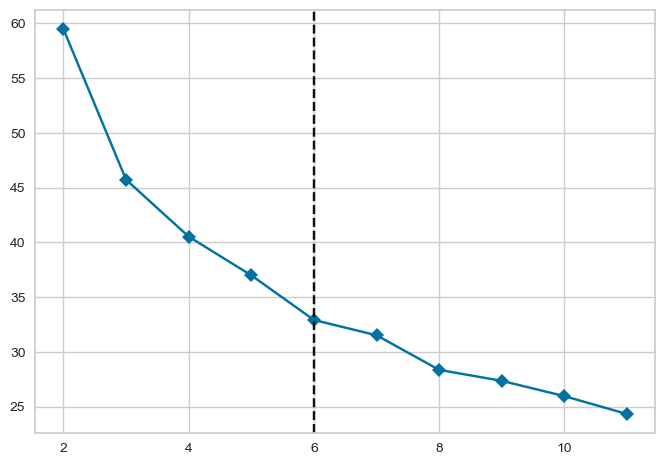

In [55]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import plotly.graph_objects as go


model = KMeans(init='k-means++', random_state=42)

# Create the Elbow plot
visualizer = KElbowVisualizer(model, k=(2, 12), metric='distortion', timings=False)

# Fit the visualizer to the data
visualizer.fit(final_df.iloc[:, 1:])

# Get the data for the Elbow plot
k_values = visualizer.k_values_
k_scores = visualizer.k_scores_

# Create the Elbow plot using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=k_values, y=k_scores, mode='markers+lines', marker=dict(size=8, color='red'), line=dict(width=2)))

fig.update_layout(
    title='Elbow Plot for KMeans Clustering',
    xaxis_title='Number of Clusters (K)',
    yaxis_title='Distortion',
    showlegend=False,
    hovermode='closest',
)

# Save the figure as an image file (Elbow.jpg)
fig.write_image('Elbow.jpg')

# Show the plot
fig.show()

In [56]:
from sklearn.metrics import davies_bouldin_score
k_mean=KMeans(n_clusters=4, init='k-means++',random_state=42)
k_mean.fit(final_df_encoded)
k_labels = k_mean.fit_predict(final_df_encoded)
print('silhouette_score :',silhouette_score(final_df_encoded, k_labels)," DB index:",davies_bouldin_score(final_df_encoded, k_labels))
print(" labels:" , set(k_labels))

silhouette_score : 0.26605733362360806  DB index: 1.3022173767267313
 labels: {0, 1, 2, 3}


In [57]:
final_df_encoded

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0      0.732860           0.087270       0.000487                0.011711   
1      0.145871           0.096882       0.000571                0.026595   
2      0.353293           0.176565       0.013335                0.036536   
3      0.223990           0.041901       0.000515                0.079653   
4      0.090352           0.116982       0.000051                0.019661   
..          ...                ...            ...                     ...   
203    0.209030           0.089237       0.012901                0.058706   
204    0.115963           0.137745       0.000208                0.016422   
205    0.577631           0.146811       0.002413                0.050622   
206    0.793736           0.065660       0.000278                0.041010   
207    0.543478           0.103257       0.001231                0.133064   

     Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0        0.005992  0.000738          0.380191           0.003300   
1        0.000772  0.000651          0.242304           0.020066   
2        0.013600  0.008957          0.149851           0.016716   
3        0.002114  0.001177          0.291671           0.314744   
4        0.020661  0.007203          0.268345           0.274809   
..            ...       ...               ...                ...   
203      0.017648  0.006019          0.257246           0.006458   
204      0.012143  0.002810          0.269679           0.164183   
205      0.002794  0.001545          0.194169           0.005615   
206      0.002919  0.000814          0.257444           0.006422   
207      0.003631  0.000482          0.264520           0.009457   

     Hours to do Tax  Infant Mortality Rate  Internet Usage  Lending Interest  \
0           0.103053               0.554223        0.026183          0.031482   
1           0.133372               0.102656        0.292308          0.025395   
2           0.154795               0.170704        0.097041          0.015315   
3           0.072384               0.034826        0.560651          0.027967   
4           0.074115               0.004959        0.644822          0.014251   
..               ...                    ...             ...               ...   
203         0.344453               0.143629        0.242012          0.024353   
204         0.072096               0.021834        0.320266          0.015926   
205         0.093867               0.348027        0.083728          0.040321   
206         0.069800               0.480599        0.060651          0.045058   
207         0.087501               0.401707        0.118787          0.276121   

     Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                  0.432076              0.397204            0.116099   
1                  0.847695              0.715164            0.250612   
2                  0.685651              0.621360            0.241022   
3                  0.858444              0.728420            0.223036   
4                  0.893855              0.756207            0.263620   
..                      ...                   ...                 ...   
203                0.850468              0.655383            0.288257   
204                0.898515              0.761805            0.254999   
205                0.508845              0.466527            0.110641   
206                0.281466              0.262966            0.109978   
207                0.230214              0.253452            0.121251   

     Population 0-14  Population 15-64  Population 65+  Population Total  \
0           0.967947          0.044136        0.075610          0.019904   
1           0.328712          0.490234        0.378471          0.002140   
2           0.427666          0.518079        0.177073          0.026534   
3           0.306239          0.519159        0.368300          0.000028   
4           0.283896          0.4

silhouette_score : 0.26605733362360806  DB index: 1.3022173767267313
 labels: {0, 1, 2, 3}


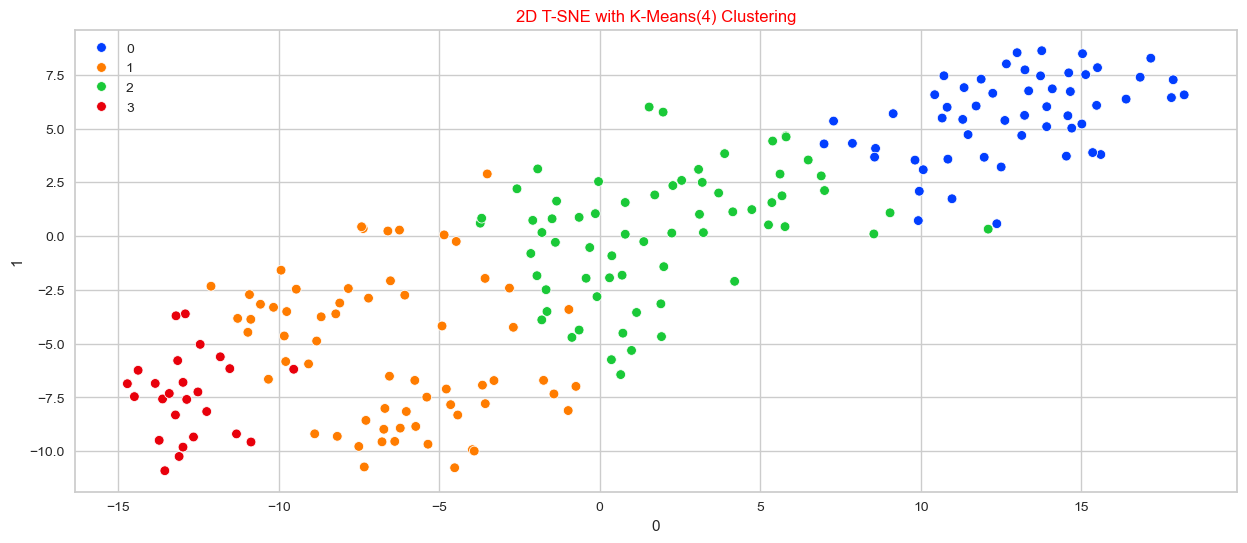

In [58]:
k_mean=KMeans(n_clusters=4, init='k-means++',random_state=42)
k_mean.fit(final_df.iloc[:,1:])
k_labels = k_mean.fit_predict(final_df.iloc[:,1:])
print('silhouette_score :',silhouette_score(final_df.iloc[:,1:], k_labels)," DB index:",davies_bouldin_score(final_df.iloc[:,1:], k_labels))
print(" labels:" , set(k_labels))
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0], y=data_tsne_2.iloc[:,1], hue=k_labels,palette='bright')
plt.title('2D T-SNE with K-Means(4) Clustering',fontdict={'color':'red'})
fig.savefig('Kmeans(4).jpg')
plt.show()

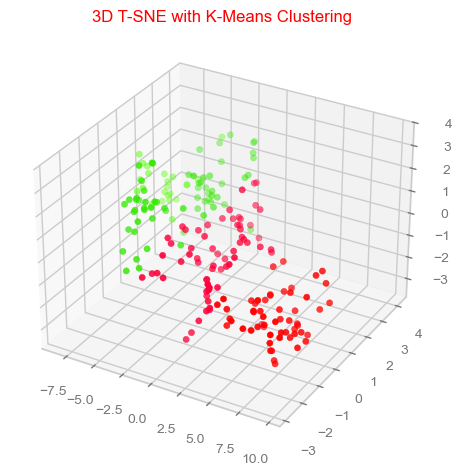

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_tsne_3.iloc[:,0], data_tsne_3.iloc[:,1], data_tsne_3.iloc[:,2],c=k_labels,cmap='prism')
ax.tick_params(axis='both', colors='#777777')
plt.title('3D T-SNE with K-Means Clustering',fontdict={'color':'red'})
fig.savefig('kmeans_3d.jpg',dpi=400)
plt.show()

silhouette_score : 0.3171703209333271  DB index: 1.1253678429808336
 labels: {0, 1, 2}


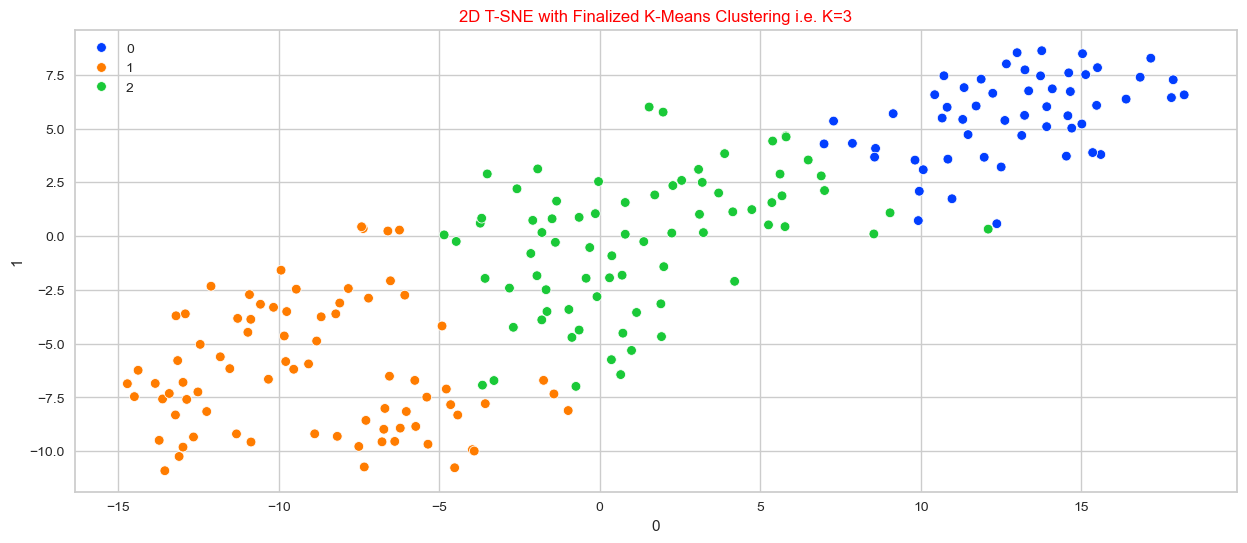

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score , davies_bouldin_score
kmean_final=KMeans(n_clusters=3, init='k-means++',random_state=42)
kmean_final.fit(final_df.iloc[:,1:])
k_labels = kmean_final.fit_predict(final_df.iloc[:,1:])
print('silhouette_score :',silhouette_score(final_df.iloc[:,1:], k_labels)," DB index:",davies_bouldin_score(final_df.iloc[:,1:], k_labels))
print(" labels:" , set(k_labels))
fig=plt.figure(figsize=(15,6))
sns.scatterplot(x=data_tsne_2.iloc[:,0], y=data_tsne_2.iloc[:,1], hue=k_labels,palette='bright')
plt.title('2D T-SNE with Finalized K-Means Clustering i.e. K=3',fontdict={'color':'red'})
fig.savefig('Kmeansfinal.jpg')
plt.show()

## Gaussian Mixture Model

In [61]:
X = final_df.iloc[:, 1:]
X

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0      0.732860           0.087270       0.000487                0.011711   
1      0.145871           0.096882       0.000571                0.026595   
2      0.353293           0.176565       0.013335                0.036536   
3      0.223990           0.041901       0.000515                0.079653   
4      0.090352           0.116982       0.000051                0.019661   
..          ...                ...            ...                     ...   
203    0.209030           0.089237       0.012901                0.058706   
204    0.115963           0.137745       0.000208                0.016422   
205    0.577631           0.146811       0.002413                0.050622   
206    0.793736           0.065660       0.000278                0.041010   
207    0.543478           0.103257       0.001231                0.133064   

     Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0        0.005992  0.000738          0.380191           0.003300   
1        0.000772  0.000651          0.242304           0.020066   
2        0.013600  0.008957          0.149851           0.016716   
3        0.002114  0.001177          0.291671           0.314744   
4        0.020661  0.007203          0.268345           0.274809   
..            ...       ...               ...                ...   
203      0.017648  0.006019          0.257246           0.006458   
204      0.012143  0.002810          0.269679           0.164183   
205      0.002794  0.001545          0.194169           0.005615   
206      0.002919  0.000814          0.257444           0.006422   
207      0.003631  0.000482          0.264520           0.009457   

     Hours to do Tax  Infant Mortality Rate  Internet Usage  Lending Interest  \
0           0.103053               0.554223        0.026183          0.031482   
1           0.133372               0.102656        0.292308          0.025395   
2           0.154795               0.170704        0.097041          0.015315   
3           0.072384               0.034826        0.560651          0.027967   
4           0.074115               0.004959        0.644822          0.014251   
..               ...                    ...             ...               ...   
203         0.344453               0.143629        0.242012          0.024353   
204         0.072096               0.021834        0.320266          0.015926   
205         0.093867               0.348027        0.083728          0.040321   
206         0.069800               0.480599        0.060651          0.045058   
207         0.087501               0.401707        0.118787          0.276121   

     Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                  0.432076              0.397204            0.116099   
1                  0.847695              0.715164            0.250612   
2                  0.685651              0.621360            0.241022   
3                  0.858444              0.728420            0.223036   
4                  0.893855              0.756207            0.263620   
..                      ...                   ...                 ...   
203                0.850468              0.655383            0.288257   
204                0.898515              0.761805            0.254999   
205                0.508845              0.466527            0.110641   
206                0.281466              0.262966            0.109978   
207                0.230214              0.253452            0.121251   

     Population 0-14  Population 15-64  Population 65+  Population Total  \
0           0.967947          0.044136        0.075610          0.019904   
1           0.328712          0.490234        0.378471          0.002140   
2           0.427666          0.518079        0.177073          0.026534   
3           0.306239          0.519159        0.368300          0.000028   
4           0.283896          0.4

In [62]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' contains the DataFrame you provided
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

# Verify the scaled data
print(scaled_df.head())


   Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0    1.718196          -0.317241      -0.209210               -0.585986   
1   -0.772317          -0.224726      -0.208111               -0.378992   
2    0.107747           0.542178      -0.040651               -0.240749   
3   -0.440867          -0.753889      -0.208844                0.358860   
4   -1.007874          -0.031273      -0.214927               -0.475421   

   Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0     -0.189226 -0.232030          1.038588          -0.618234   
1     -0.252149 -0.233250         -0.171500          -0.516590   
2     -0.097530 -0.116655         -0.982852          -0.536899   
3     -0.235974 -0.225870          0.261744           1.269946   
4     -0.012424 -0.141270          0.057033           1.027832   

   Hours to do Tax  Infant Mortality Rate  Internet Usage  Lending Interest  \
0        -0.044167               1.860008       -1.066489          0.2030

In [63]:
scaled_df

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
0      1.718196          -0.317241      -0.209210               -0.585986   
1     -0.772317          -0.224726      -0.208111               -0.378992   
2      0.107747           0.542178      -0.040651               -0.240749   
3     -0.440867          -0.753889      -0.208844                0.358860   
4     -1.007874          -0.031273      -0.214927               -0.475421   
..          ...                ...            ...                     ...   
203   -0.504341          -0.298305      -0.046351                0.067561   
204   -0.899210           0.168553      -0.212871               -0.520471   
205    1.059581           0.255810      -0.183942               -0.044857   
206    1.976485          -0.525224      -0.211956               -0.178529   
207    0.914677          -0.163371      -0.199456                1.101611   

     Energy Usage       GDP  Health Exp % GDP  Health Exp/Capita  \
0       -0.189226 -0.232030          1.038588          -0.618234   
1       -0.252149 -0.233250         -0.171500          -0.516590   
2       -0.097530 -0.116655         -0.982852          -0.536899   
3       -0.235974 -0.225870          0.261744           1.269946   
4       -0.012424 -0.141270          0.057033           1.027832   
..            ...       ...               ...                ...   
203     -0.048738 -0.157897         -0.040363          -0.599088   
204     -0.115092 -0.202943          0.068747           0.357147   
205     -0.227773 -0.220695         -0.593927          -0.604201   
206     -0.226268 -0.230961         -0.038628          -0.599308   
207     -0.217691 -0.235616          0.023471          -0.580911   

     Hours to do Tax  Infant Mortality Rate  Internet Usage  Lending Interest  \
0          -0.044167               1.860008       -1.066489          0.203099   
1           0.297568              -0.443735       -0.007805         -0.067055   
2           0.539030              -0.096580       -0.784605         -0.514406   
3          -0.389839              -0.789782        1.059707          0.047098   
4          -0.370339              -0.942152        1.394555         -0.561615   
..               ...                    ...             ...               ...   
203         2.676710              -0.234703       -0.207890         -0.113264   
204        -0.393087              -0.856064        0.103419         -0.487266   
205        -0.147699               0.808065       -0.837569          0.595387   
206        -0.418971               1.484404       -0.929372          0.805620   
207        -0.219457               1.081923       -0.698098         11.060474   

     Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                 -1.208826             -1.129209           -1.018239   
1                  0.725025              0.668148            0.024339   
2                 -0.028956              0.137893           -0.049990   
3                  0.775041              0.743079           -0.189396   
4                  0.939804              0.900155            0.125157   
..                      ...                   ...                 ...   
203                0.737930              0.330222            0.316118   
204                0.961486              0.931800            0.058340   
205               -0.851624             -0.737339           -1.060543   
206               -1.909607             -1.888028           -1.065683   
207               -2.148076             -1.941808           -0.978307   

     Population 0-14  Population 15-64  Population 65+  Population Total  \
0           1.895380         -2.082470       -1.133185         -0.041821   
1          -0.451254          0.441456        0.344970         -0.231576   
2          -0.087995          0.598995       -0.637980          0.029005   
3          -0.533754          0.605106        0.295330         -0.254139   
4          -0.615774          0.4

In [64]:
from sklearn.mixture import GaussianMixture

# Load your data here (assuming the data is stored in the 'final_df' DataFrame)


# Choose the number of clusters (components) for the GMM
n_clusters = 3

# Create the Gaussian Mixture Model
gmm_model = GaussianMixture(n_components=n_clusters, random_state=42)

# Fit the GMM to the data
gmm_model.fit(final_df_encoded)

GaussianMixture(n_components=3, random_state=42)

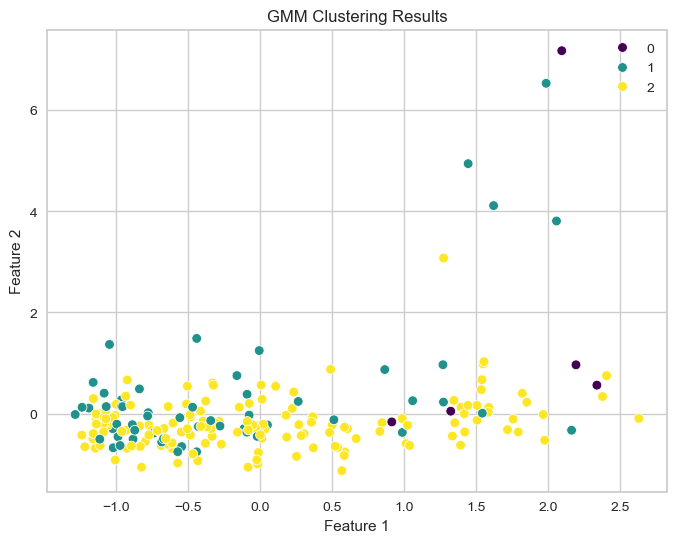

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Assuming you have already fitted the GMM model and have 'gmm_model' and 'scaled_df' available

# Get the predicted cluster labels for each data point
gmm_assignments = gmm_model.predict(scaled_df)

# Add the predicted cluster labels to the DataFrame
scaled_df_with_labels = scaled_df.copy()
scaled_df_with_labels['Cluster'] = gmm_assignments

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_df_with_labels.iloc[:, 0], y=scaled_df_with_labels.iloc[:, 1], hue=gmm_assignments, palette='viridis', legend='full')
plt.title("GMM Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Comparing Models

In [66]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder

# Assuming k_mean, clusterer, and gmm_model are already trained and fitted

# Drop the 'Country' column from final_df before encoding
final_df_encoded = final_df.drop(columns=['Country'])

# Preprocess the data by encoding categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in final_df_encoded.columns:
    if final_df_encoded[column].dtype == 'object':  # Check if the column is categorical
        final_df_encoded[column] = label_encoder.fit_transform(final_df_encoded[column])

# Predict cluster assignments for each data point
kmeans_assignments = k_mean.fit_predict(final_df_encoded)
agglomerative_assignments = clusterer.fit_predict(final_df_encoded)
gmm_assignments = gmm_model.predict(final_df_encoded)

# Calculate Silhouette Score for each model
kmeans_silhouette = silhouette_score(final_df_encoded, kmeans_assignments)
agglomerative_silhouette = silhouette_score(final_df_encoded, agglomerative_assignments)
gmm_silhouette = silhouette_score(final_df_encoded, gmm_assignments)

# Calculate Davies-Bouldin Index for each model
kmeans_db_index = davies_bouldin_score(final_df_encoded, kmeans_assignments)
agglomerative_db_index = davies_bouldin_score(final_df_encoded, agglomerative_assignments)
gmm_db_index = davies_bouldin_score(final_df_encoded, gmm_assignments)

# Print the results
print("Silhouette Score:")
print("K-Means:", kmeans_silhouette)
print("Agglomerative Clustering:", agglomerative_silhouette)
print("Gaussian Mixture Model:", gmm_silhouette)

print("\nDavies-Bouldin Index:")
print("K-Means:", kmeans_db_index)
print("Agglomerative Clustering:", agglomerative_db_index)
print("Gaussian Mixture Model:", gmm_db_index)


Silhouette Score:
K-Means: 0.26605733362360806
Agglomerative Clustering: 0.2107538119220314
Gaussian Mixture Model: 0.24800938804521416

Davies-Bouldin Index:
K-Means: 1.3022173767267313
Agglomerative Clustering: 1.0786679016945415
Gaussian Mixture Model: 1.3436110555781866


## Inference

- Based on these scores, K-Means performs the best among the three clustering algorithms in your case, followed by Agglomerative Clustering. Gaussian Mixture Model shows the weakest performance

The silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a score closer to 1 indicates that the clusters are well-separated, a score of 0 indicates that the object is on or very close to the decision boundary between two clusters, and a score less than 0 means the object may have been assigned to the wrong cluster.

The Davies-Bouldin index, on the other hand, quantifies the average "similarity" between each cluster's points and the centroid of that cluster. A lower Davies-Bouldin index value indicates a better separation between the clusters, and a higher value suggests that clusters are overlapping.

For K-Means:

Silhouette score: 0.2428193101169246 (closer to 1, indicates reasonably well-defined clusters)
Davies-Bouldin index: 1.3415333562277771 (relatively low, indicates good separation)

For Agglomerative Clustering:

Silhouette score: 0.2107538119220314 (closer to 1, indicates reasonably well-defined clusters)
Davies-Bouldin index: 1.0786678996157337 (lower than K-Means, suggests better separation of clusters)

For Gaussian Mixture Model:

Silhouette score: 0.19933673978338587 (the lowest of the three, indicates weaker clustering)
Davies-Bouldin index: 1.4761285315126647 (the highest of the three, indicates some overlapping clusters)

# Deployment

In [68]:
!pip install dill

In [69]:
!pip install streamlit

In [4]:
import joblib

# Save the model
model = joblib.load('k_means.pkl')


print("Model trained and saved successfully!")


Model trained and saved successfully!


In [5]:
# app.py
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import streamlit as st
from dill import load
from sklearn.preprocessing import MinMaxScaler

# Load the trained K-Means model
with open("k_means.pkl", "rb") as file:
    loaded_model = load(file)

# Define the cluster prediction function
def Cluster_prediction(input_data):
    input_data = np.array(input_data, dtype=float).reshape(1, -1)
    scaler = MinMaxScaler()
    input_data_scaled = scaler.fit_transform(input_data)
    prediction = loaded_model.predict(input_data_scaled)

    if prediction[0] == 0:
        return "DEVELOPED COUNTRY", "green"
    elif prediction[0] == 1:
        return "UNDER DEVELOPED COUNTRY", "red"
    else:
        return "DEVELOPING COUNTRY", "blue"

# Streamlit App
def main():
    st.set_page_config(page_title="Country Development Predictor", page_icon="🌍", layout="wide")

    st.markdown(
        "<h1 style='color:green;'>Predicting the State of Development of a Country</h1>",
        unsafe_allow_html=True
    )
    st.markdown("<h4 style='color:blue;'>Enter the values below to predict the country's development status</h4>", unsafe_allow_html=True)

    st.sidebar.header("Input Parameters")
    st.sidebar.markdown("<h5 style='color:red;'>Please fill in all fields to avoid errors</h5>", unsafe_allow_html=True)

    # Sidebar inputs
    Birth_Rate = st.sidebar.number_input('Birth Rate (0.000 - 1.000)', step=0.001, format="%.3f")
    Business_Tax_Rate = st.sidebar.number_input('Business Tax Rate (%)')
    CO2_Emissions = st.sidebar.number_input('CO2 Emissions')
    Days_to_Start_Business = st.sidebar.number_input('Days to Start Business')
    Energy_Usage = st.sidebar.number_input('Energy Usage')
    GDP = st.sidebar.number_input('Total GDP ($)')
    Health_Exp_GDP = st.sidebar.number_input('Health Exp % GDP') / 100
    Health_Exp_Capita = st.sidebar.number_input('Health Exp/Capita ($)')
    Hours_to_do_Tax = st.sidebar.number_input('Hours to do Tax')
    Infant_Mortality_Rate = st.sidebar.number_input('Infant Mortality Rate (0.000 - 1.000)', step=0.001, format="%.3f")
    Internet_Usage = st.sidebar.number_input('Internet Usage')
    Lending_Interest = st.sidebar.number_input('Lending Interest (%)')
    Life_Expectancy_Female = st.sidebar.number_input('Life Expectancy Female (years)')
    Life_Expectancy_Male = st.sidebar.number_input('Life Expectancy Male (years)')
    Mobile_Phone_Usage = st.sidebar.number_input('Mobile Phone Usage')
    Population_0_14 = st.sidebar.number_input('Population 0-14 (%)') / 100
    Population_15_64 = st.sidebar.number_input('Population 15-64 (%)') / 100
    Population_65_and_above = st.sidebar.number_input('Population 65+ (%)') / 100
    Population_Total = st.sidebar.number_input('Total Population')
    Population_Urban = st.sidebar.number_input('Urban Population (%)') / 100
    Tourism_Inbound = st.sidebar.number_input('Tourism Inbound ($)')
    Tourism_Outbound = st.sidebar.number_input('Tourism Outbound ($)')

    # Prepare dataframe to show entered values
    data = {
        'Birth rate': Birth_Rate,
        'Business tax rate': Business_Tax_Rate,
        'CO2 Emissions': CO2_Emissions,
        'Days to start business': Days_to_Start_Business,
        'Energy usage': Energy_Usage,
        'GDP': GDP,
        'Health Exp % in GDP': Health_Exp_GDP,
        'Health exp/capita': Health_Exp_Capita,
        'Hours to do Tax': Hours_to_do_Tax,
        'Infant Mortality Rate': Infant_Mortality_Rate,
        'Internet usage': Internet_Usage,
        'Lending interest': Lending_Interest,
        'Life expectancy female': Life_Expectancy_Female,
        'Life expectancy male': Life_Expectancy_Male,
        'Mobile phone usage': Mobile_Phone_Usage,
        'Population%(0-14)': Population_0_14,
        'Population%(15-64)': Population_15_64,
        'Population% 65+': Population_65_and_above,
        'Total Population': Population_Total,
        'Urban Population %': Population_Urban,
        'Tourism Inbound': Tourism_Inbound,
        'Tourism Outbound': Tourism_Outbound
    }

    st.write("### Entered Data Preview")
    st.dataframe(pd.DataFrame(data, index=["Values"]).T, width=600, height=800)

    # Predict button
    if st.button("Predict Development Status"):
        input_features = [[
            Birth_Rate, Business_Tax_Rate, CO2_Emissions, Days_to_Start_Business, Energy_Usage, GDP,
            Health_Exp_GDP, Health_Exp_Capita, Hours_to_do_Tax, Infant_Mortality_Rate, Internet_Usage,
            Lending_Interest, Life_Expectancy_Female, Life_Expectancy_Male, Mobile_Phone_Usage,
            Population_0_14, Population_15_64, Population_65_and_above, Population_Total,
            Population_Urban, Tourism_Inbound, Tourism_Outbound
        ]]

        result, color = Cluster_prediction(input_features)
        st.markdown(f"<h3>This is a <span style='color:{color};'>{result}</span></h3>", unsafe_allow_html=True)

if __name__ == "__main__":
    main()
